# Heart Disease Prediction

Во овој проект го користам датасетот од Kaggle -https://www.kaggle.com/cherngs/heart-disease-cleveland-uci?select=heart_cleveland_upload.csv.
Ќе користиме различни методи и алгоритми од машинско учење со цел да предвидиме дали дадена личност страда од заболување на срцето.

### Вчитување на потребни датотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Вчитување на датасет и негово разгледување со цел донесување на заклучоци

In [2]:
df = pd.read_csv('heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.5 KB


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Statstical Details Describe ни дава статистики податоци во нумерички формат. Од табелата можеме да забелижиме дека максималната возраст е 77 години, а минималната е 29 години, а средната е 54.5 години. Податоците се поделени на 3 квартили или 4 подеднакви делови, по 25% од податоците лежат во секоја група. Стадардната девијација и средната вредност ни даваат идеа за централната тенденција на датасетот, со тоа што средната вредност е под влијание на outliers.

#### Објаснување на 13 - те карактеристики (features)

Разгледуваме 13 карактеристики:

* age: возраст изразена во години
* sex: пол (1 = машко; 0 = женско)
* cp: тип на болка во гради
 -- Вредност 0: типична ангина
 -- Вредност 1: атипична ангина
 -- Вредност 2: не-ангинална болка
 -- Вредност 3: асимптоматски
* trestbps: нормален крвен притисок (in mm Hg on admission to the hospital)
* chol: холестрерол во 0.01kg / m^3 
* fbs: ниво на шеќер во крвта (при постење):120 mg/dl (1 = да ;0 = не)
* restecg: ЕКГ резултати при физичко мирување
** -- Вредност 0: Нормални резултати 
** -- Вредност 1: абнормалности на ST-T сегментот на ЕКГ сигналот (T wave inversions and/or ST elevation or depression of > 0.05 mV)
** -- Вредност 2: најверојатна или дефинитивна вертикуларна хипертрофија на левата комора на срцето според Естес критериум. (Рomhilt-Estes LVH Point Score System: If the score equals 4, LVH is present with 30% to 54% sensitivity. If the score is greater than 5, LVH is present with 83% to 97% specificity.)
* thalach: наголем број на срцеви отчувања измерени (максимален пулс)
* exang: срцева ангина предизвикана од физичка активност (1 = да; 0 = не)
* oldpeak = СТ-депресија предизвикана од физичка активност во релација со истата при одмарање
st dpression se odnesuva na toa koga pri pravenje na ecg, vo ST segmentot se dobivaat signali koi se pod normalnite granici.
(ako vrema vrednost najmalce 2 ili nad 2 pri pravenje na stres test togash idicira reversible ischaemia)
* slope: наклон на пикот на СТ сегменотот од ЕКГ сигналот
** -- Вредност 0: растечки 
** -- Вредност 1: константен
** -- Вредност 2: опаѓачки
* ca: број на главни крвни садови (0-3) обоени при флуроскопија
* thal: Бета таласемија - наследно нарушување на крвта 0 = normal; 1 = fixed defect; 2 = reversable defect 0 = Thalassemia minor;? 1 = Thalassemia intermedia?; 2 = Thalassemia major;? 
* срцево заболување: 0 = нема заболување, 1 = има заболување

In [5]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
age          297 non-null int64
sex          297 non-null int64
cp           297 non-null int64
trestbps     297 non-null int64
chol         297 non-null int64
fbs          297 non-null int64
restecg      297 non-null int64
thalach      297 non-null int64
exang        297 non-null int64
oldpeak      297 non-null float64
slope        297 non-null int64
ca           297 non-null int64
thal         297 non-null int64
condition    297 non-null int64
dtypes: float64(1), int64(13)
memory usage: 32.5 KB
None


Забележуваме дека во датасетот нема податоци за кои имаме вредност 0.
Затоа нема потреба од исфрлање на податоци или пополнување на вредностите кои недостасуваат

### Барање на зависност помеѓу атрибутите

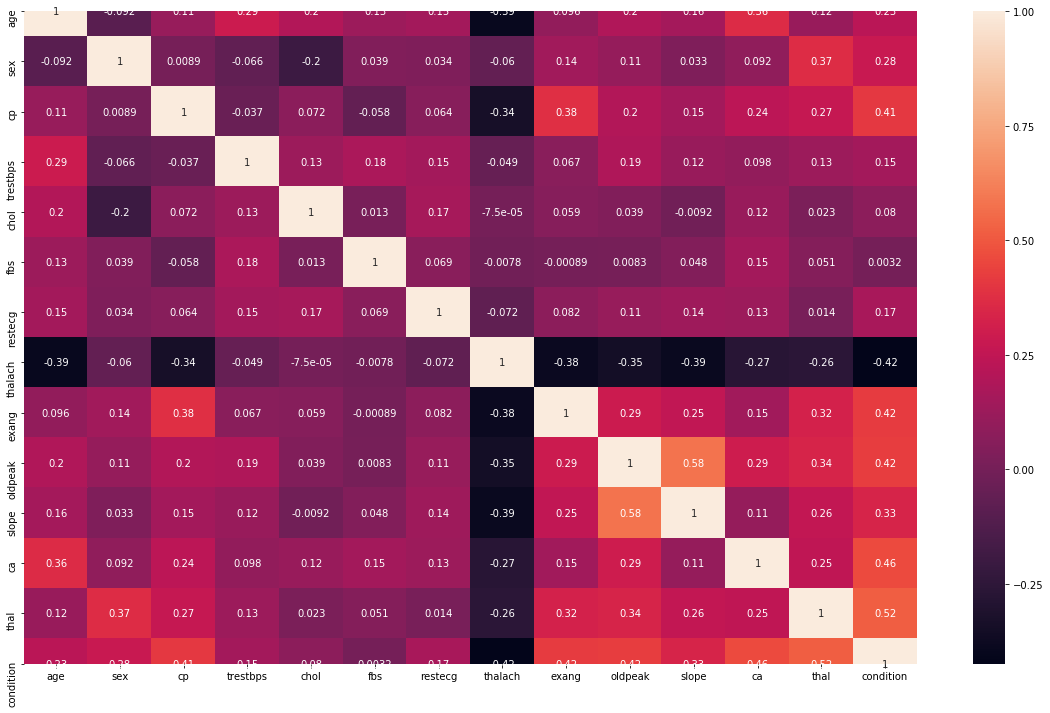

In [7]:
import seaborn as sns
plt.figure(figsize=(20,12))
g=sns.heatmap(df.corr(),annot=True)

Од мапата можеме на забележиме кои карактеристики (features) како влијаат врз појавата на срцево заболување. Доколку ја гледаме последната колона од мапата, забележуваме дека сите карактеристики имаат позитивни коефициенти на зависност освен максималниот пулс (thalach) кој има негативен коефициент. Тоа значи дека постоењето на срцево заболување односно таргетот (condition) зависи прапорционално од сите карактеристики, освен од thalach од кој зависи обратнопропрционално. Најголем коефициент има бета таласемија (thal) - 0.52, а најмал шеќер во крвта при постење (fbs) - 0.0032

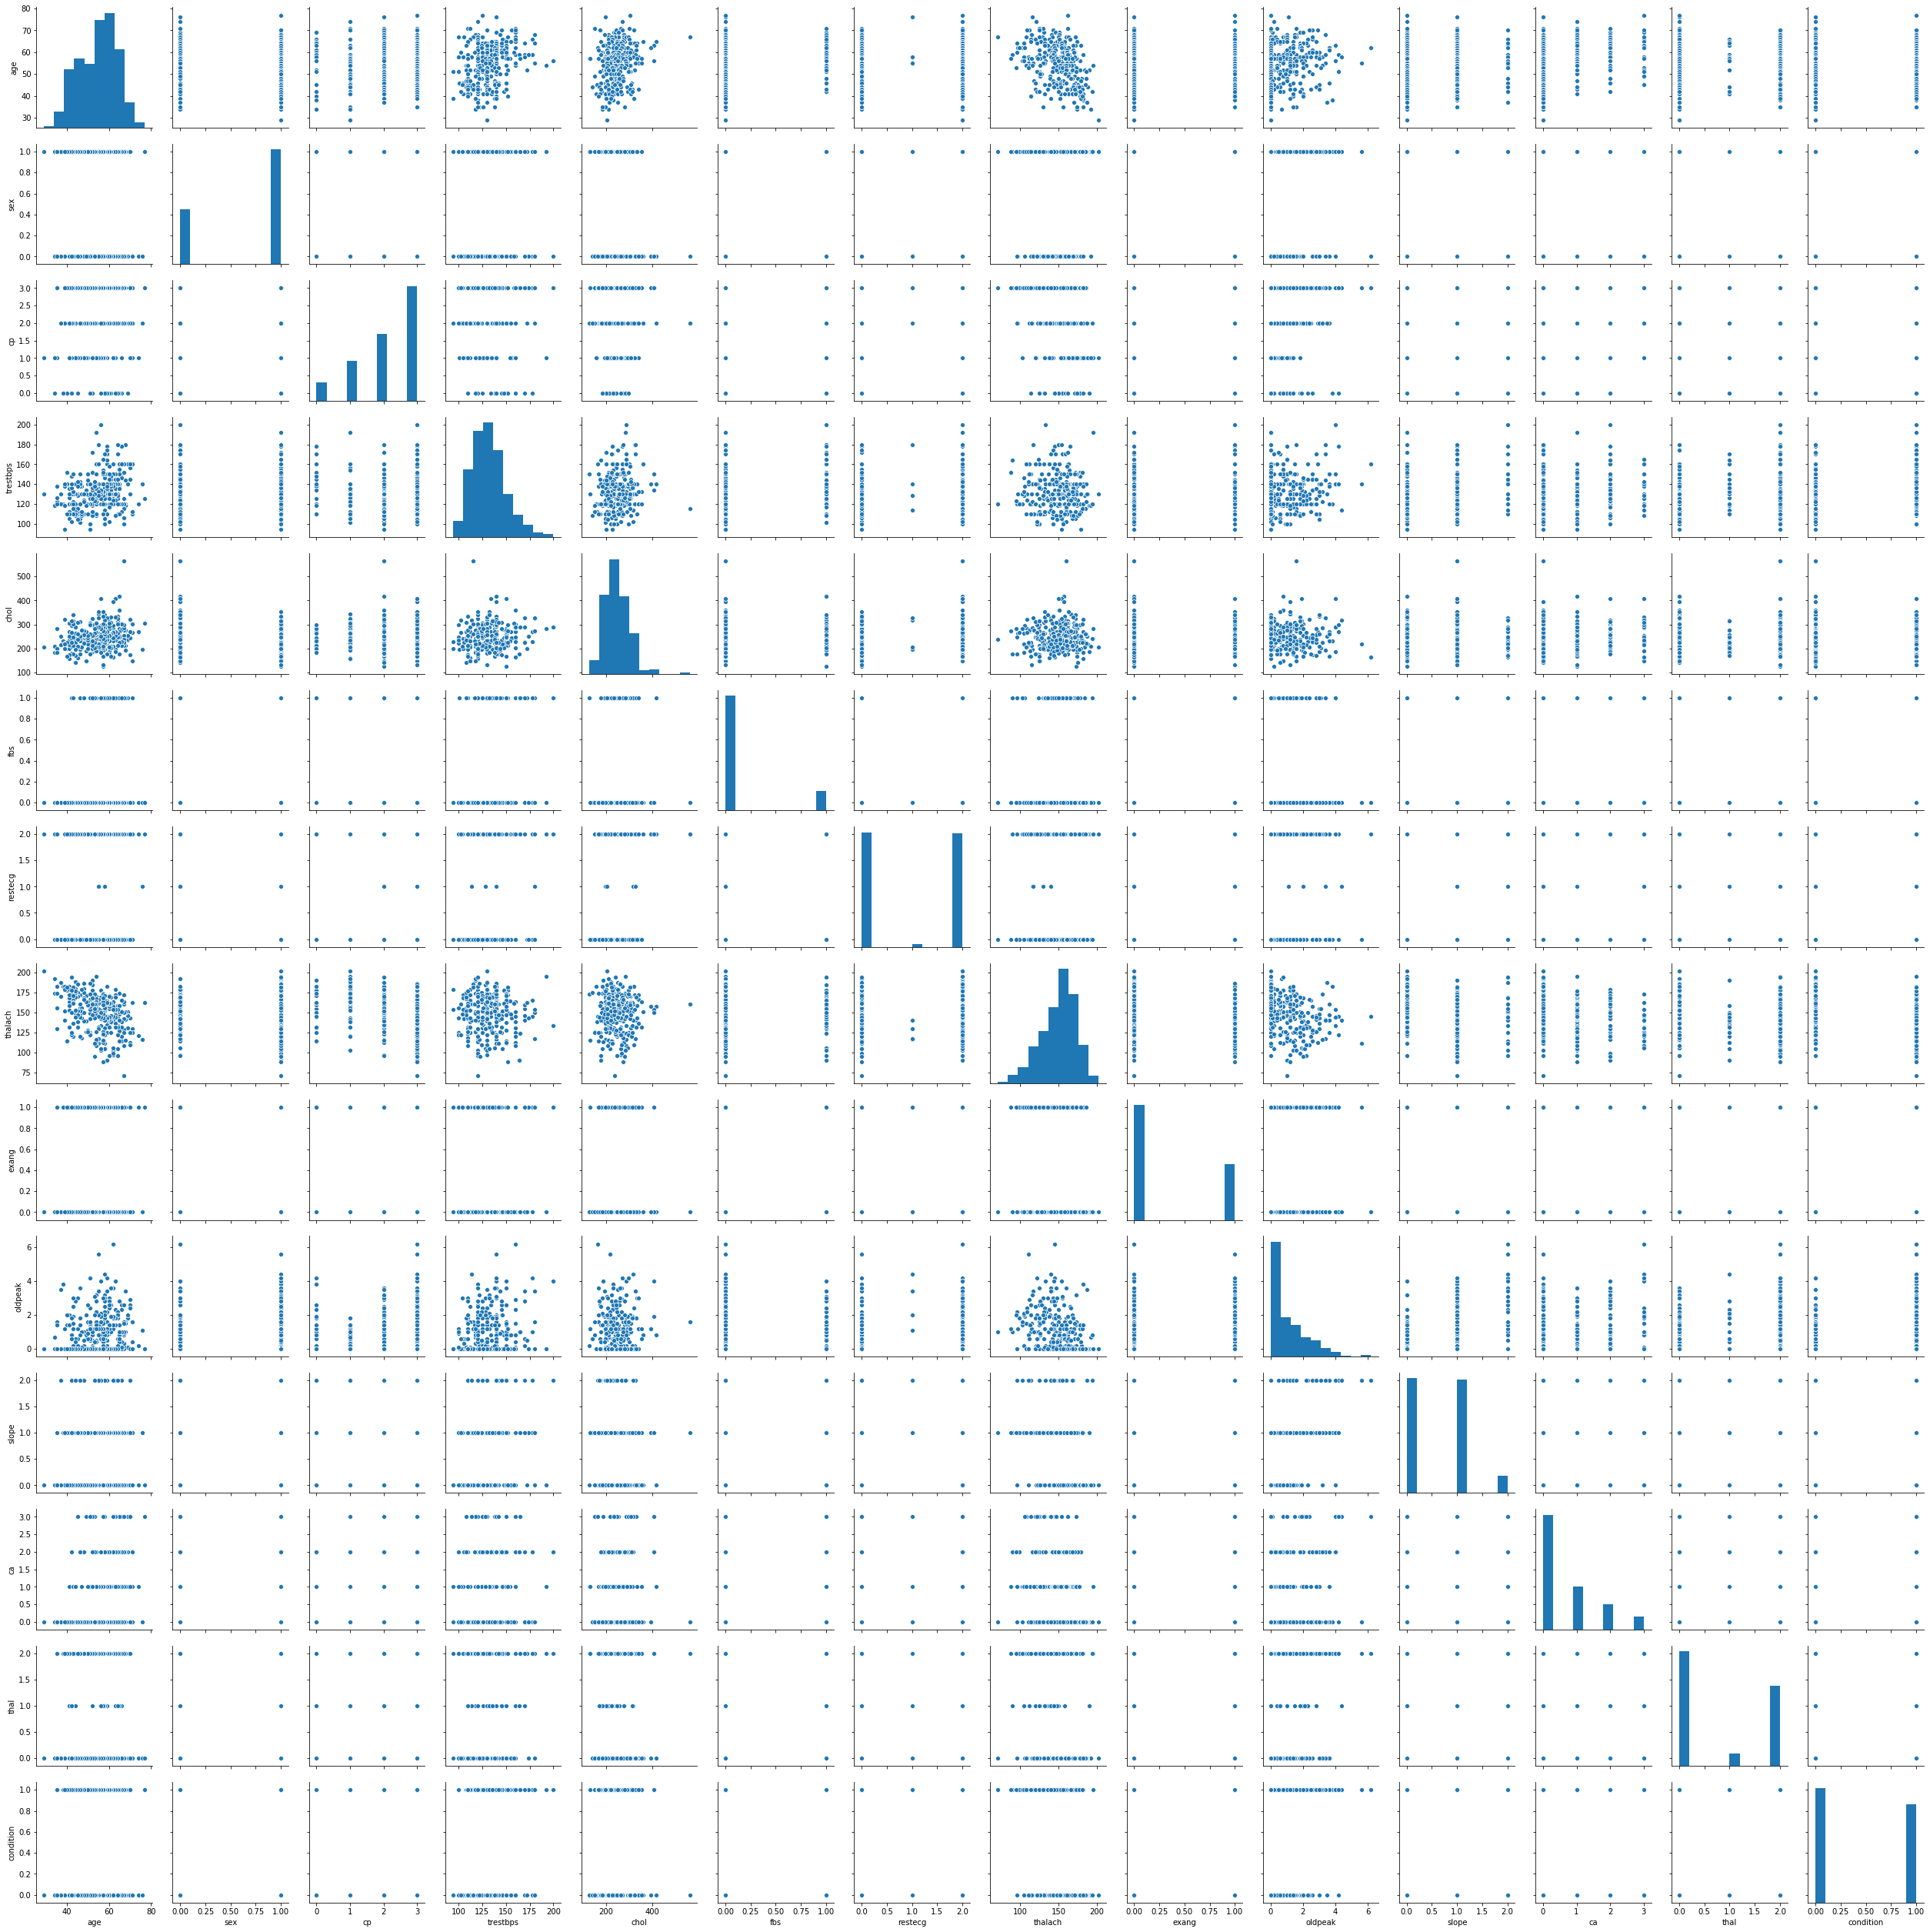

In [8]:
sns.pairplot(data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x144CA950>,
      dtype=object)

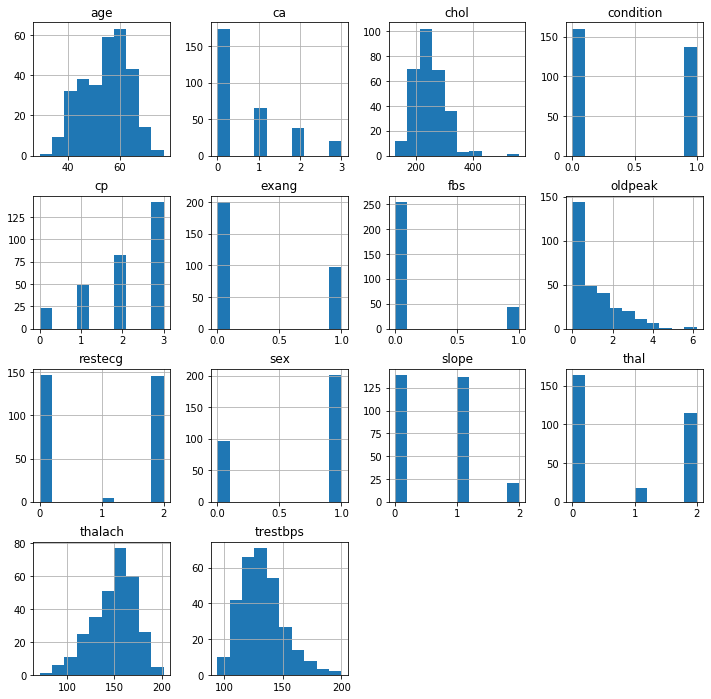

In [9]:
df.hist(figsize=(12,12), layout=(4,4))

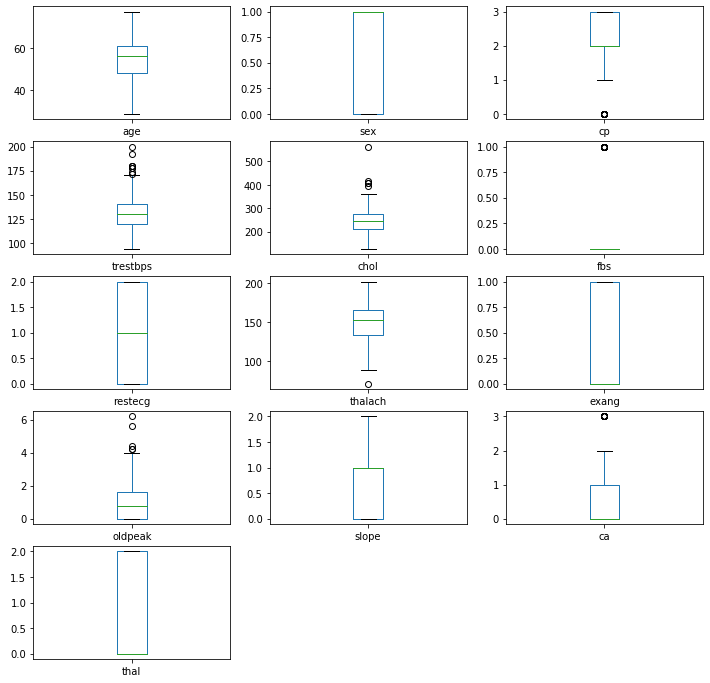

In [10]:
# box and whiskers plot
df_t = df.drop(['condition'],axis=1)
df_t.plot(kind='box', subplots=True, layout=(5,3), figsize=(12,12))
plt.show()

Забележуваme некои отстапувања(outlieres - вредности кои остапуваат од опсегот во кој се движат останати врености за одредена карактеристика) кога станува збор за:<br>
    cp - болки во градите<br>
    trestpbs - нормален крвен притисок<br>
    chol - холестерол <br>
    fbs - ниво на шеќер во крв <br>
    oldpeak - СТ-депресија предизвикана од физичка активност во релација со истата при одмарање<br>
    ca - број на крвни садови осветлени при флоуроскопија<br>

### Приказ на countplots за дискретни променливи.
Бројот на мажи(1) е поголем од бројот на жени во обервациите.<br>
Асимтоматската болка  во гради (3) е најчест тип на болка неангинална (2) е втор најчест тип.<br>
Бројот на обесервации со ниво на шеќер во крвта < 120 mg/dl при постење (0) е поголем.<br>
Бројот на нормални резултати (0) е најфреквентен кога станува збор за ЕКГ резулти, додека најверојатна или дефинитивна вертикуларна хипертрофија на левата комора на срцето според Естес критериум(2) го зазема второто место .<br>
Имаме повеќе обсервации за срцева ангина која не е предизвикана од физичка активност (0).<br>
Ратечки наклон (0) е најчест тип на наклон на СТ-сегмент, константен (1) е втор најчест.<br>
(0) е најчест број на обоени крвни садови при флуороскопија, (1) е втор најчест.<br>
(0) Thalassemia minor е најчеста категорија на припадност во thal, (2) Thalassemia major е втора најчеста.<br>
Конечно, во обсервациите бројот на пациенти кои немаат срцево заболување е поголем.<br>

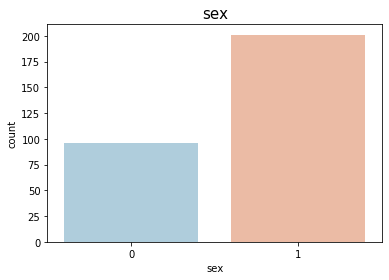

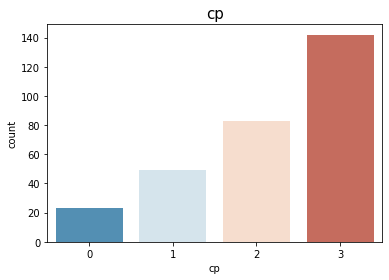

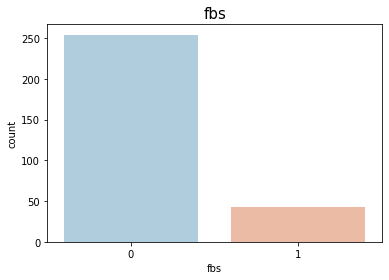

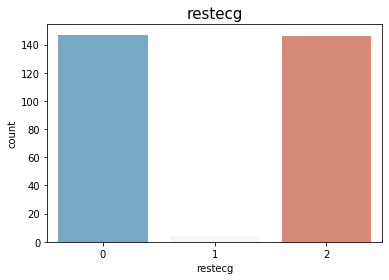

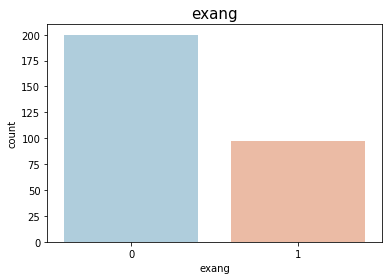

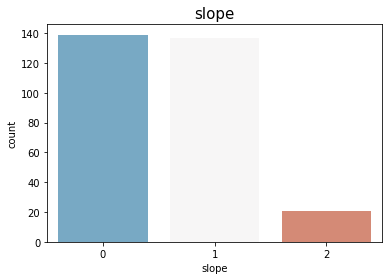

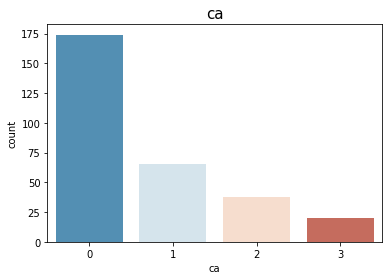

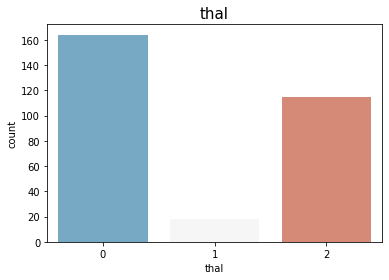

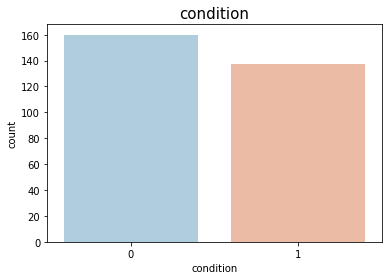

In [11]:
df1 = df.drop(['age','trestbps','chol','thalach','oldpeak'],axis=1)

for i, col in enumerate(df1.columns):
    plt.figure(i)
    plt.title(col, color='black',fontsize=15)
    sns.countplot(x=col, data=df1,palette='RdBu_r')

### Countplots со срцево заболување (condition) како втор фактор.
Мажите страдаат од срцеви заболувања повеќе од колку жените.<br>
Интересено е да се обесервира дека пациентите со асимптомацики болки во градите имаат поголем степен на срцеви заболувања од колку останатите пациенти.Овој фактор влегува во heatmap со коефициент 0.41 што не е низок коефициент, меѓутоа можеби болката во срцето (cp) не е добар индикатор за постоење на срцево заболување.<br>
Според ЕКГ резултатите при физичко мирување, пациентите со вредност (1) и (2) се посклони на срцеви заболувања.<br>
Пциентите со ангина предизвикана од физичка активност се по склони на срцеви заболувања.<br>
Според наклонот на пикот на СТ-сегментот на ЕКГ резултатот, пациентите со константен наколон имаат поголема рата на срцеви заболувања.<br>
Бројот на пациенти со срцеви заболувања се зголемува како што се зголемува бројот на обоени крвини садови (0-3) при флуороскопија.<br>
Според thal, пациентите со halassemia major страдаат повеќе од срцеви заболувања од колку останатите две категории.

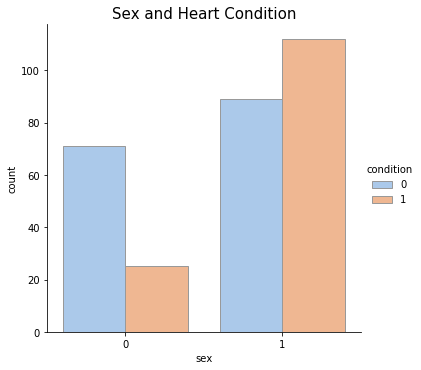

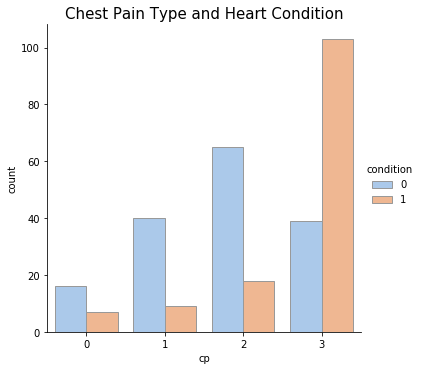

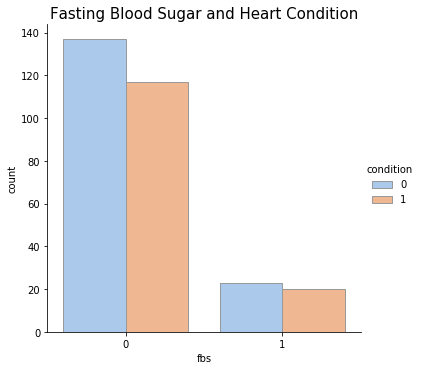

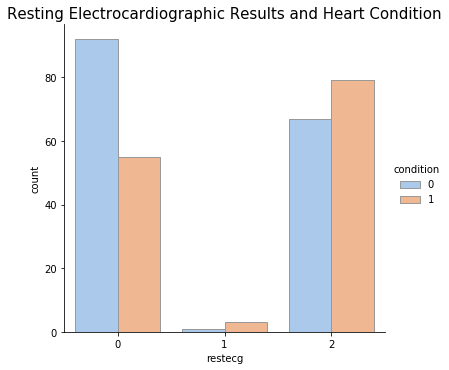

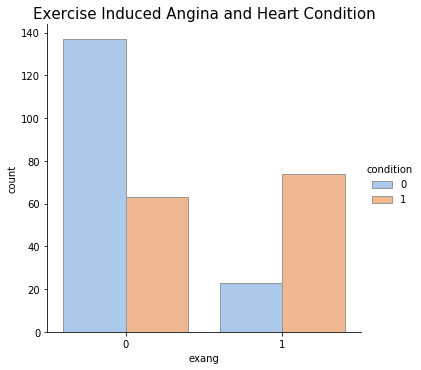

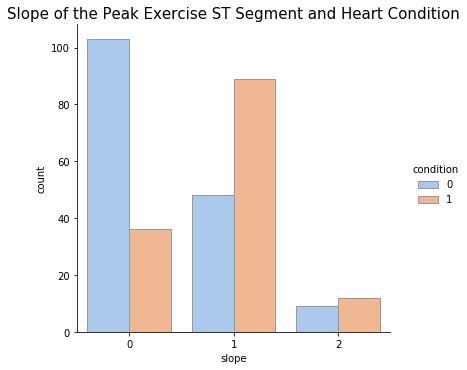

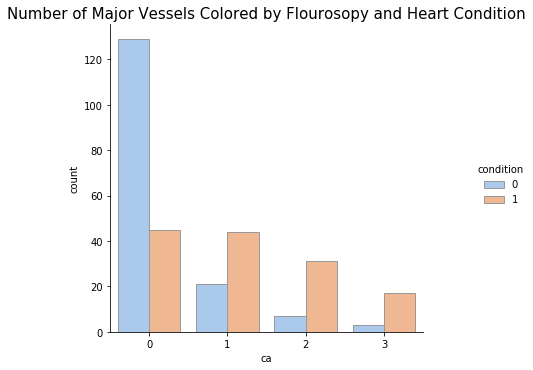

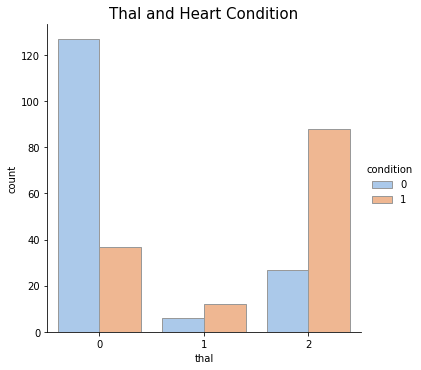

In [12]:
sns.catplot(x="sex", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Sex and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="cp", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Chest Pain Type and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="fbs", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Fasting Blood Sugar and Heart Condition', fontsize=15)
plt.show()

sns.catplot(x="restecg", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Resting Electrocardiographic Results and Heart Condition',fontsize=15)
plt.show()

sns.catplot(x="exang", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Exercise Induced Angina and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="slope", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Slope of the Peak Exercise ST Segment and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="ca", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Number of Major Vessels Colored by Flourosopy and Heart Condition',  fontsize=15)
plt.show()

sns.catplot(x="thal", hue="condition", kind="count",
            palette="pastel", edgecolor=".6",
            data=df);
plt.title('Thal and Heart Condition',fontsize=15)
plt.show()

### Категорични во однос на дискретни вредности

Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, и најчесто кај пациенти кои во старосна група од 35 до 70 години.<br>
Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, притиоа крвниот притсок при мирување се движи од 100 до 180, додека бројот на срцеви заболувања во однос на срцева ангина која не е предизикана од физичка активност е знацително помал кога станува збор за истиот опесег на крвен притисок.<br>
Истото важи и во однос на холестеролот, поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, со тоа што нивото на холестерол кај оние со срцеви заболувања се движи претежно од 180 мг/дл до 350 мг/дл со неколку отстапувања.<br>
Поголем е бројот на пациенти од срцеви заболувања доколку станува збор за срцева ангина предизвикана од физичка активност, со тоа што максималниот пулс варира од 90 до 180.<br>
Исто важи и за СТ депресија, со тоа што вредностите на СТ депресија најчесто се движат во опсег од 2 до 4.<br>

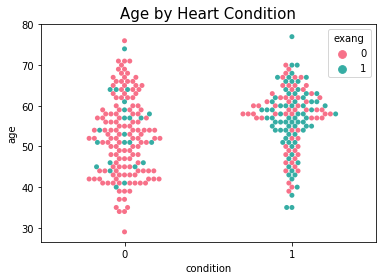

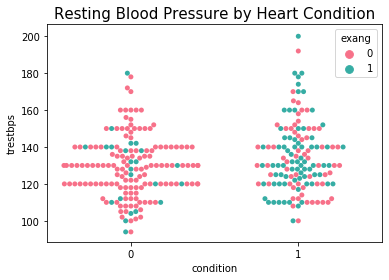

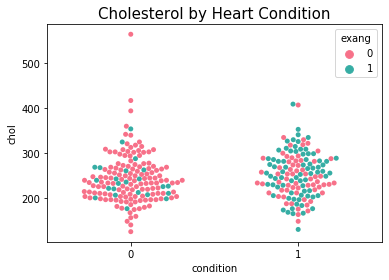

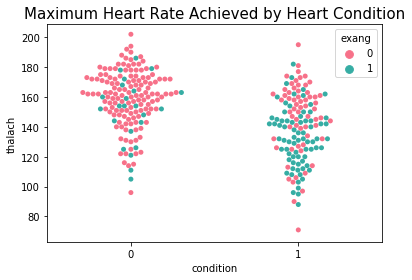

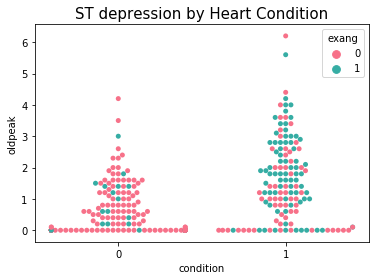

In [13]:
# exang
sns.swarmplot(x="condition", y="age", hue='exang' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='exang' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='exang' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='exang' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='exang' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',  fontsize=15)
plt.show()

Од првиот график се гледа дека најмногу срцви заболувања имаат пациентите со години од 38 до 70 со тоа што наклонот на кривата на СТ сегметот е 1 - контантен, доколку наклонот на кривата е 0 - опаѓачки пациентите најчесто не страдаат од срцево заболување,додека долку наклонот на кривата е 2- растечки бројот на пациенти што страдаат и не страдаат од срцеви заболувања е речиси подеднакво поделен<br>
Истите заклучоци можат да се добијат и за останатите карактеристики со тоа што:<br>
trestbs - има неколку две впечатливи отстапувања имаме вредности за наклон 0 и наклон 2 што припаѓаат на пациенти со срцеви заболувања притоа со надпросечно висок кревен притисок од 195/200<br>
chol - има едно впечатливо отстапување, иако поголемиот дел на пациенти со slope 1 припаѓаат во пациенти со срвеци заболувања, оваа е пациент без срцево заболување со прилично високо ниво на холестерол од околу 600<br>
oldpeak - има две отстапувања за вредност наклон 2, притоа со многу високо ниво на ст-депресија 5.5 и 6.5, и станува збор за пациенти со срцево заболубање

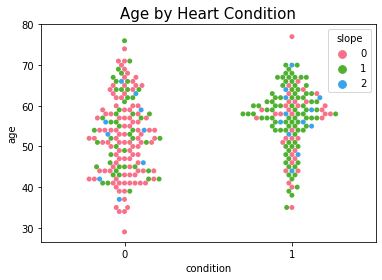

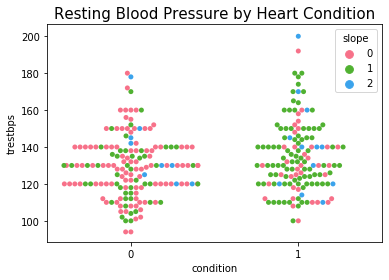

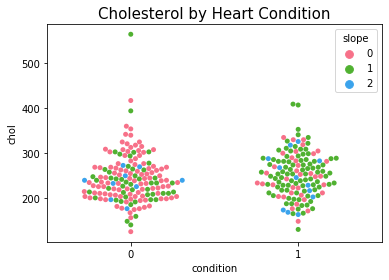

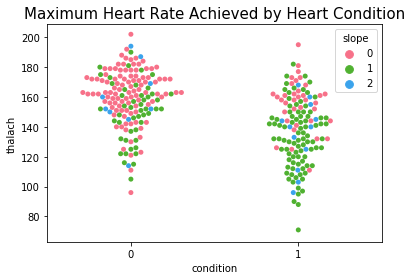

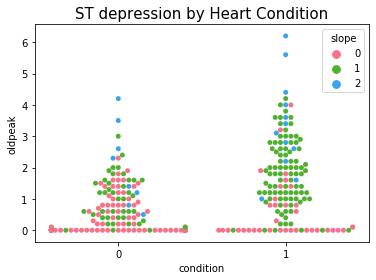

In [14]:
# slope
sns.swarmplot(x="condition", y="age", hue='slope' ,data=df,palette='husl' )
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='slope' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='slope' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition',  fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='slope' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='slope' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

Од графиците може да се забележи дека најголемиот дел од пациентите со вредност ca=0 припаѓаат во групата без срцеви заболувања, додека со растење на вредноста на ca расте и бројот на заболени пациенти.<br>
Опсегот на години во кои припаѓаат пациентите со срцеви заболувања се движи од 45 до 70, со едно отстапување.<br>
Крвниот притсок на пациенти со срцево заболување се движи од 100 до 180, со две отстапувања.<br>
Максималниот пулс се движи во опсег од 90 до 180, кај пациенти со срцеви заболувања, а кај пациенти без срцеви заболувања е значително поголем од 150 до 190 со неколку отстапувања.<br>
oldpeak - има две отстапувања за вредност на ca 0 и 3, притоа со многу високо ниво на ст-депресија 5.5 и 6.5, и станува збор за пациенти со срцево заболубање

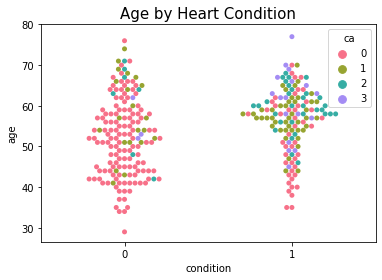

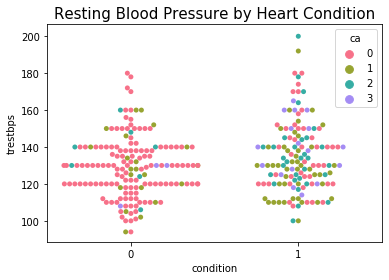

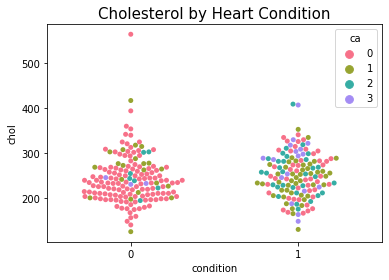

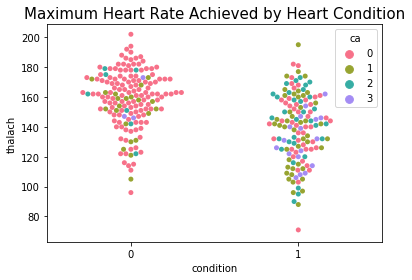

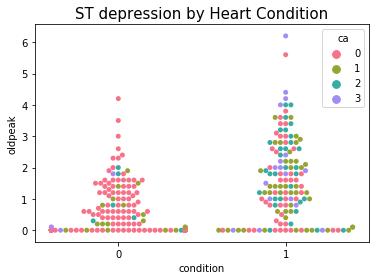

In [15]:
# ca
sns.swarmplot(x="condition", y="age", hue='ca' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='ca' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='ca' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='ca' ,data=df,palette='husl' )
plt.title('Maximum Heart Rate Achieved by Heart Condition',fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='ca' ,data=df, palette='husl')
plt.title('ST depression by Heart Condition',fontsize=15)
plt.show()

Како и во претходните случаеви, за сите графици на кој се обработува thal важи дека за вредност на thal- 0 поголемиот број на пациенти немаат срцево заболување, за вредност на thal-2 поголемиот број на пациенти имаат срцево заболување, а thal-1 бројот е поделен речиси исто.

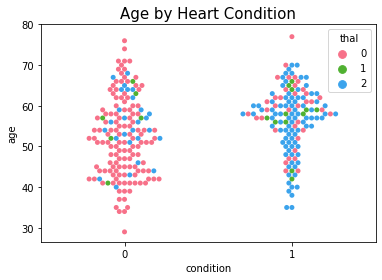

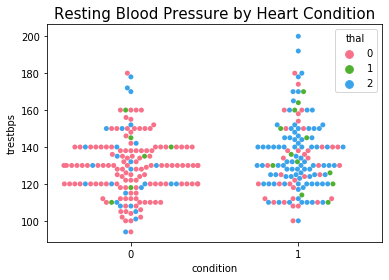

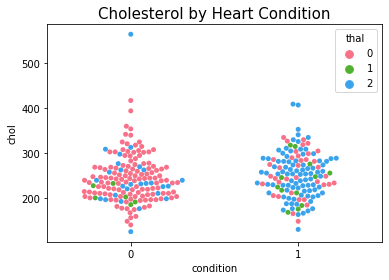

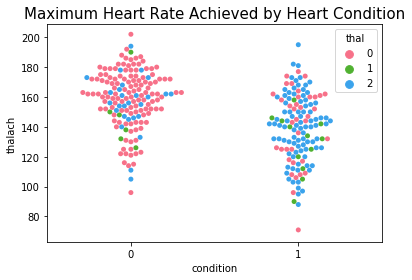

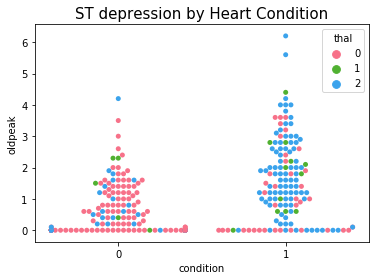

In [16]:
#thal
sns.swarmplot(x="condition", y="age", hue='thal' ,data=df, palette='husl')
plt.title('Age by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="trestbps",hue='thal' ,data=df, palette='husl')
plt.title('Resting Blood Pressure by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="chol",hue='thal' ,data=df, palette='husl')
plt.title('Cholesterol by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="thalach",hue='thal' ,data=df, palette='husl')
plt.title('Maximum Heart Rate Achieved by Heart Condition', fontsize=15)
plt.show()

sns.swarmplot(x="condition", y="oldpeak",hue='thal' ,data=df,  palette='husl')
plt.title('ST depression by Heart Condition', fontsize=15)
plt.show()

### Data Processing
 
По разгледувањето и објаснување на датасетот дадено погоре можеме да забележиме дека има многу features кои имаат категорични вредности, за да ги претвориме таканаречените categorical features во dummy variables ќе го користиме методот 'get_dummies', а потоа ќе извршиме скалирање на вредностите, видејќи како што се гледа погоре имаме големи разлики во вредностите. На пример за age имаме вредности од 29 до 77 години, за chol од 126 до 564, а condition има вредности само 0 и 1, затоа имаме потреба од скалирање.

In [17]:
dataset = pd.get_dummies(df, columns = ['cp','restecg', 'exang', 'slope', 'ca', 'thal'])
dataset.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,condition,cp_0,cp_1,...,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,thal_0,thal_1,thal_2
0,69,1,160,234,1,131,0.1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,69,0,140,239,0,151,1.8,0,1,0,...,1,0,0,0,0,1,0,1,0,0
2,66,0,150,226,0,114,2.6,0,1,0,...,0,0,1,1,0,0,0,1,0,0
3,65,1,138,282,1,174,1.4,1,1,0,...,0,1,0,0,1,0,0,1,0,0
4,64,1,110,211,0,144,1.8,0,1,0,...,0,1,0,1,0,0,0,1,0,0


Во табелата погоре можеме да забележиме дека се додадени нови колини кои одговараат на категорични вредности кои ги имавме претходно.

## Data scaling
### Standartization and Normalization

#### Normalization(Min-max Normalization)
- ни овозможува да ги скалираме вредностите помеѓу 0 и 1
- $ Xnorm = (X-Xmin)/(Xmax-Xmin) $

#### Standartization(StandardScaler)
- ни овозможува слалирање на вредностите базирано на стандарна нормална распределба(најчесто mean(mi) = 0, а  std(sigma) = 1)
- $ z = (x-mi)/sigma $

### Стандардизација

In [18]:
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler
#standardScaler = StandardScaler()
#columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
#dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

### Нормализација

In [19]:
from sklearn.preprocessing import MinMaxScaler
X = dataset.drop(["condition"],axis = 1)
y = dataset.condition
scaler = MinMaxScaler().fit(X)
X_scaled = scaler.transform(X)

X1 = dataset.drop(["condition"],axis = 1)
y1 = dataset.condition
scaler1 = MinMaxScaler().fit(X1)
X1_scaled = scaler1.transform(X1)

### Класификација

Класификацијата е процес на класифицирање на одреден датасет во одреден број на класи. Во нашиот случај имаме бинарна класицикација, бидејќи еден пациент може да страда од заболување на срцето или да не страда од истото. 
Класификатор во овој случај има потреба од traning data за да разбере како влезните променливе се поврзани со класата. Од како ќе го истренираме класикаторот, истиот може да се користи за предвидување дали одреден пациент со одредени параметри има срцево заболување или не.<br>
*Класификатор - алгоритам што врши мапирање на влезните податоци во одредена категорија<br>
*Клацификациски модел - врши донесување заклучоци влезните податоци кои се издвоени за тренирање и предвидува во која категорија припаѓа пациентот<br>
*Бинарна класификација - две класи (0-1)<br>

Ќе ги следиме следниве постапки:<br>
<ul>
    <li>Иницијализација на класификаторот</li>
    <li>Тренеирање на класификаторот - .fit(за тренирање на X_train и y_train)</li>
    <li>Предвидување на тратгетот на y_test множеството</li>
    <li>Евалуација (cross-val, roc)</li>
</ul>

### Поделба да датасет

Датасетот го делиме на X_train и у_train на кој ќе вршиме тренирање на моделите, и на X_test и y_test со кој ќе вршиме тестирање на моделите. Тоа го правиме со функцијата train_test_split.

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=40)
X1_train, X1_test, y1_train, y1_test=train_test_split(X1_scaled,y1,test_size=0.3,random_state=40)

In [21]:
print('X_train-', X_train.size)
print('X_test-',X_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 5382
X_test- 2340
y_train- 207
y_test- 90


На овој датасет ќе користиме 6 алгоритми за класикација и тоа:
<ul>
    <li>K-Nearest Neighbor</li>
    <li>Naive Bayes</li>
    <li>Logistic Regression</li>
    <li>Decision Tree Classifier</li>
    <li>Random Forest Classifier</li>
    <li>Support Vector Machine</li>
</ul>

### K Nearest Neighbors Classifier

Го користиме алгоритмот K Nearest Neighbors, кој класифицира одреден примерок од датасетот во зависнот како неговите најблиски соседи се класифицирани. Коефициентот k се оснесува на тоа колку примероци ќе бидат земени во предвид при поцесот на класификација.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [23]:
kNN = KNeighborsClassifier()
model_kNN = kNN.fit(X_train, y_train)
prediction_kNN = model_kNN.predict(X_test)
y_pred_quant_kNN = model_kNN.predict_proba(X_test)[:, 1]

Се фитуваат X_train и y_train во KNN моделот. Потоа го тестираме моделот на X_test податоците, колку добро предвидува.

In [24]:
print(confusion_matrix(y_test, prediction_kNN))
accuracy_score(y_test,prediction_kNN)

[[35 13]
 [ 7 35]]


0.7777777777777778

<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 35</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 35</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 13</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 7</li>
</ul>
Точноста во овој случај изнесува 0.78

In [25]:
print(classification_report(y_test, prediction_kNN))

              precision    recall  f1-score   support

           0       0.83      0.73      0.78        48
           1       0.73      0.83      0.78        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Со вкрстена валидација се дели датасетот на неколку блокови во зависност од избрата вредност, и се земаат различни комбинации од тие блокови за тренирање и тестирање на моделот, во случајов е 10.

Точност-score kNN: 0.87
[[36 12]
 [15 27]]
Прецизност kNN: 0.69
Чувствителност kNN: 0.64
F1 kNN: 0.67


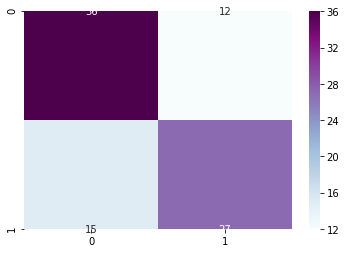

In [26]:
score_kNN = cross_val_score(kNN, X_train, y_train, cv=10)
score_kNN
print("Точност-score kNN: %0.2f" % (score_kNN.mean()))
y_kNN_pred = cross_val_predict(kNN, X_test, y_test, cv=10)
mkNN = confusion_matrix(y_test, y_kNN_pred)
sns.heatmap(mkNN, annot=True,cmap='BuPu')
print(mkNN)
preci_kNN = precision_score(y_test, y_kNN_pred)
print("Прецизност kNN: %0.2f" % preci_kNN)
sensi_kNN = recall_score(y_test, y_kNN_pred)
print("Чувствителност kNN: %0.2f" % sensi_kNN)
f1_kNN = f1_score(y_test, y_kNN_pred)
print("F1 kNN: %0.2f" % f1_kNN)
proba_kNN = cross_val_predict(kNN, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Откако ќе направиме вкрстена валидација со вредност 10, гледаме дека kNN алгоритмот дава полоши резултати. 
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 36</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 27</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 12</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 15</li>
</ul>

Иако откако ќе искористиме вкрстена валидација се добива полоши резултати во confusion matrix, точноста на алгоритмот е подобра и изнесува 0.87, меѓутоа се намалуваат вредностите на прециност, чувствителност и f1-score.

#### Validation Curve (indetification of over/under fitting)

Validation curve се исцртува во однос на соодветен хиперпараметар, додека Learning curve се исцртува во однос на број на примероци.

In [27]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_neighbors'
param_range = np.arange(3, 20, 2)
cv= StratifiedKFold(4)

train_scores, valid_scores = validation_curve(kNN, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                                cv=cv)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.81531532 0.79372197 0.76681614 0.85650224]
 [0.78378378 0.77130045 0.75336323 0.8161435 ]
 [0.73873874 0.76681614 0.69955157 0.79372197]
 [0.73423423 0.7264574  0.70403587 0.75784753]
 [0.74324324 0.7264574  0.68609865 0.73991031]
 [0.74324324 0.70852018 0.65470852 0.73542601]
 [0.72972973 0.71300448 0.68161435 0.70852018]
 [0.72072072 0.70852018 0.67264574 0.7309417 ]
 [0.74324324 0.71300448 0.65919283 0.75336323]]
[[0.62666667 0.59459459 0.71621622 0.5       ]
 [0.58666667 0.58108108 0.74324324 0.52702703]
 [0.61333333 0.59459459 0.71621622 0.54054054]
 [0.61333333 0.60810811 0.68918919 0.51351351]
 [0.58666667 0.62162162 0.75675676 0.51351351]
 [0.6        0.60810811 0.7972973  0.52702703]
 [0.57333333 0.62162162 0.82432432 0.55405405]
 [0.61333333 0.60810811 0.81081081 0.54054054]
 [0.62666667 0.67567568 0.75675676 0.56756757]]


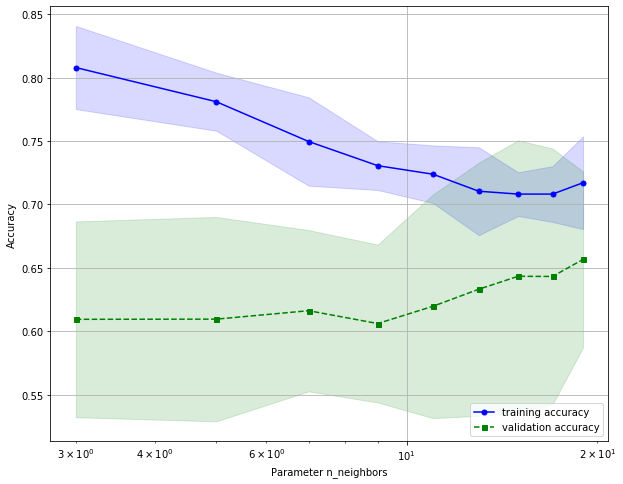

In [28]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n_neighbors')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

Точноста на тренгиг датасетот се намалува со зголеување на вредноста на хиперпараметарот, додека на тест датасетот со вкрестена валидација се зголемува. Вредноста на trening score е поголема од вредноста на testing score -  overfitting

#### Learning Curve

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


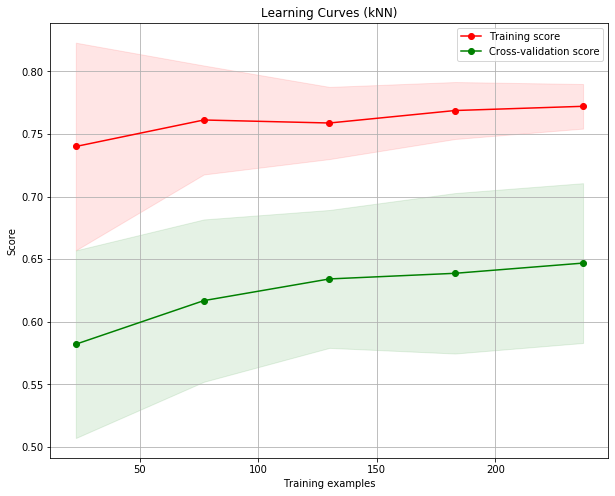

In [30]:
title = "Learning Curves (kNN)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = kNN
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Моделот дава подобри резултати на тренинг дата сетот, а полоши на тест дата сетот со вксрстена валидација. Точноста на тренинг дата сетот со зголемување на бројот на примероци за тренирање. Исто се случува и со точноста на датасетот со вкрстена валидација. Тоа би можело да значи дека со зголемување на бројот на примероци во дата сетот точноста би била подобра. Двете криви не конверигаат кон одредена вредност и растојанието помеѓу нив е големo, исто така score вредноста е далеку помала од посакуваната- high variance.

#### ROC Curve

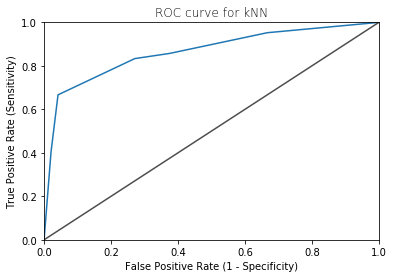

AUC Score : 0.8645833333333333


In [31]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN = auc(fpr, tpr)
print("AUC Score :", auc_kNN)

Точноста што претходно ја добивме сама по себе не значи ништо. Оваа крива ја исцртуваме во случај кога класата со негативни примероци од помала од класата со позитивни примероци(од confusion matrix)  ROC кривата исцртува два параметри:
<ul>
    <li>True Positive Rate -recall</li>
    <li>False Positive Rate - (1-specificity)</li>
</ul>
Во случај без вкрстена валидација, само со фитување на датасетот во моделот, AUC изнесува 0.854583 

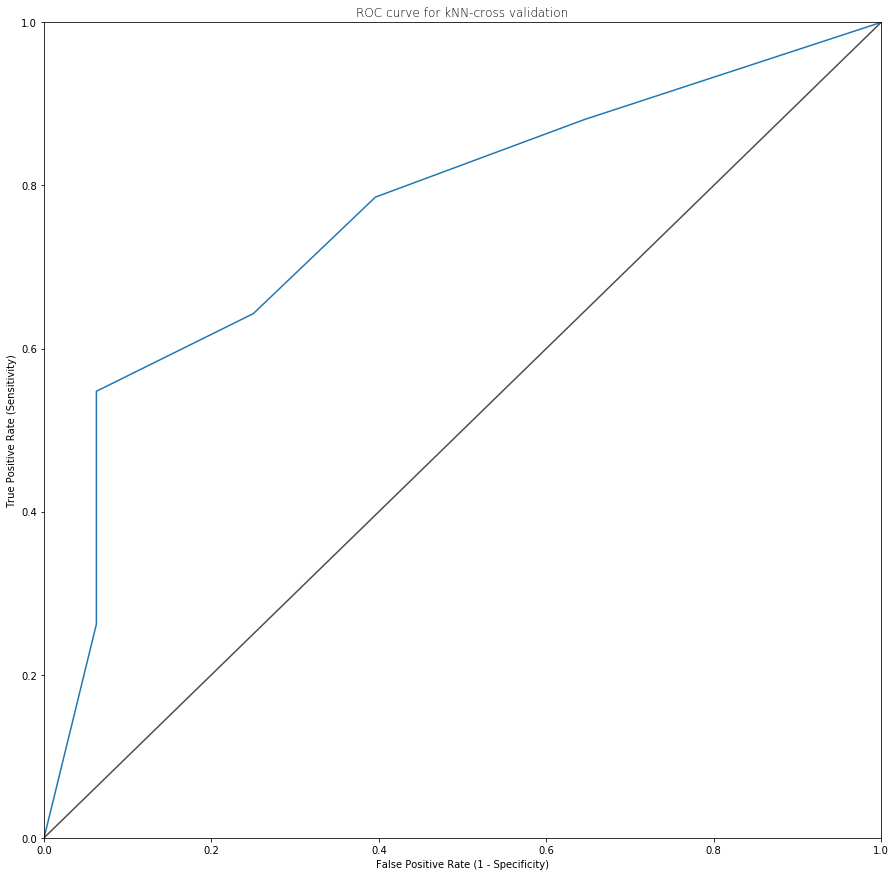

AUC Score : 0.7653769841269842


In [32]:
fpr, tpr, thresholds = roc_curve(y_test, proba_kNN)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN_score = auc(fpr, tpr)
print("AUC Score :", auc_kNN_score)

Откако ќе биде направена вкрстена валидација, вредноста на AUC се намалува, но моделот би требало да даде подобри резултати на претходно не видени податоци, отколку моделот на кој не е направена вкрстена валидација.

#### Model tunning

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv = GridSearchCV(kNN, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Со цел подобро да го истренираме нашиот модел, можеме да го нагодиме параметарот n_neighbors односно k, кој ни кажува колку примероци во околина на k ќе бидат земени во предвид при класифицирање на даден податок. Најчено кога се работа за бинарен дата сет, се зема непарна вредност за k. Овде се користи Grid Search за да се одреди вредноста на k, како и вкрстена валидација со вредност 10, и добивме 11.

In [35]:
print("Best score:" + str(knn_cv.best_score_))
print("Best parameters: " + str(knn_cv.best_params_))

Best score:0.8840579710144928
Best parameters: {'n_neighbors': 11}


In [36]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn_tuned = knn.fit(X_train, y_train)

In [37]:
prediction_knn = knn_tuned.predict(X_test)
y_pred_knn_tuned = knn_tuned.predict_proba(X_test)[:, 1]

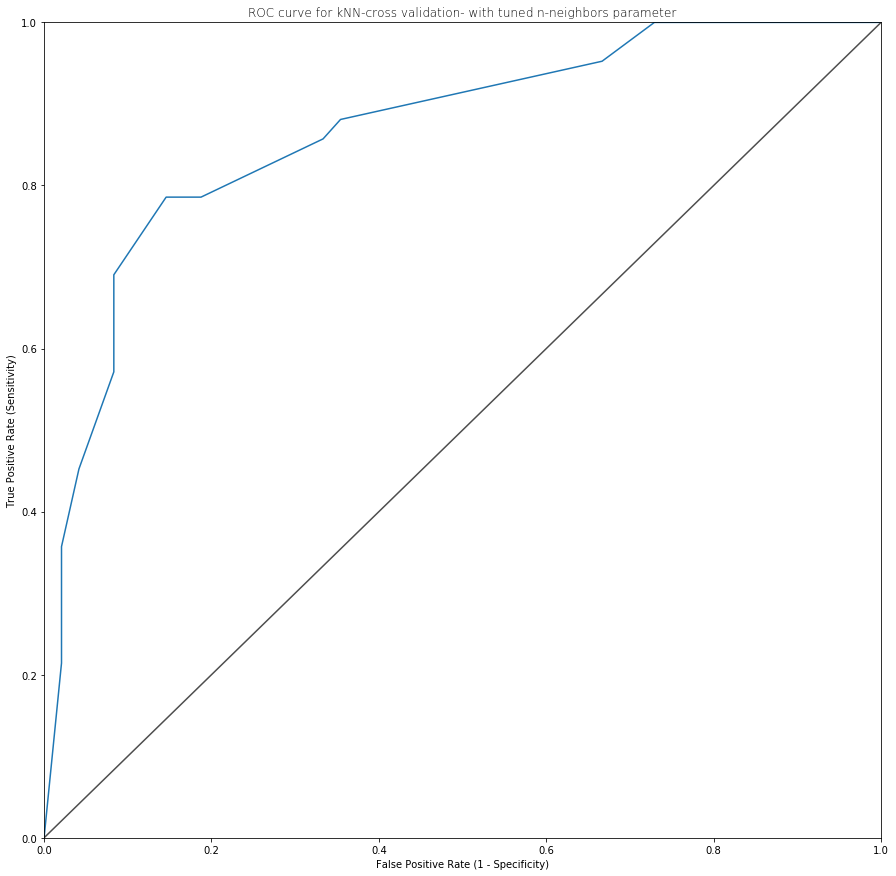

AUC Score : 0.8670634920634921


In [38]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred_knn_tuned )

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for kNN-cross validation- with tuned n-neighbors parameter', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_kNN_tuned = auc(fpr, tpr)
print("AUC Score :", auc_kNN_tuned)

По нагодување на хиперпараметарот k добиваме со овој класификатор AUC вредност од 0.8670 што е најдобра во однос на другите две.

### Gaussian Naive Bayes

Gaussian Naive Bayes е класификатор кој се базира на тоа дека каректеристиките (features) се претсвавени со гаусова распределба. Секоја од карактеристиките се апроксимира со гаусова распределба (овде би имале два случаи, гаусова распределба за одредена каратеристика за заболен и гаусова распределба за не заболен, потоа се пресметува likelihood во однос на тоа дека пациентот е заболен и во однос на тоа дека не е заболен, и се избира поголемата вредност).

In [39]:
from sklearn.naive_bayes import GaussianNB

In [40]:
NB = GaussianNB()
model_NB = NB.fit(X_train, y_train)
prediction_NB = model_NB.predict(X_test)
y_pred_quant_NB = model_NB.predict_proba(X_test)[:, 1]

In [41]:
accuracy_score(y_test,prediction_NB)
print(confusion_matrix(y_test, prediction_NB))

[[41  7]
 [11 31]]


Само со тренирање на овој модел, добиваме точност од 0.8.Од confusion matrix можеме да заклучиме следново:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 41</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 31</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 7</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување -11</li>
</ul>

In [42]:
print(classification_report(y_test, prediction_NB))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82        48
           1       0.82      0.74      0.78        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



#### Validation Curve

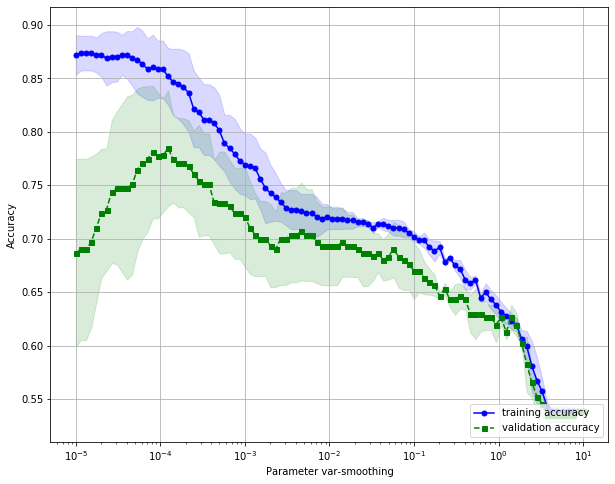

In [43]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

param_name = 'var_smoothing'
param_range = np.logspace(-5,1, num=100)

train_scores, valid_scores = validation_curve(NB, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range
                                               )


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter var-smoothing')
plt.ylabel('Аccuracy')
#plt.ylim([0.8, 1.0])
plt.show()

Од графикот се гледа дека за вредности поголеми од 0.0004 перформансот почнува да опаѓа, исто така:
<ul>
    <li>За мали вредноси на параметарот гама training е прилично добар, меѓутоа testing score е прилично помал - overfit </li>
    <li> За средни и високи вредности на гама двата, training score и testing score се прилично исти - good fit, меѓутоа точноста (score) е прилично низок</li>
</ul>

#### Cross-validation

Точност-score NB: 0.84
[[36 12]
 [15 27]]
Прецизност NB: 0.69
Чувствителност NB: 0.64
F1 NB: 0.67


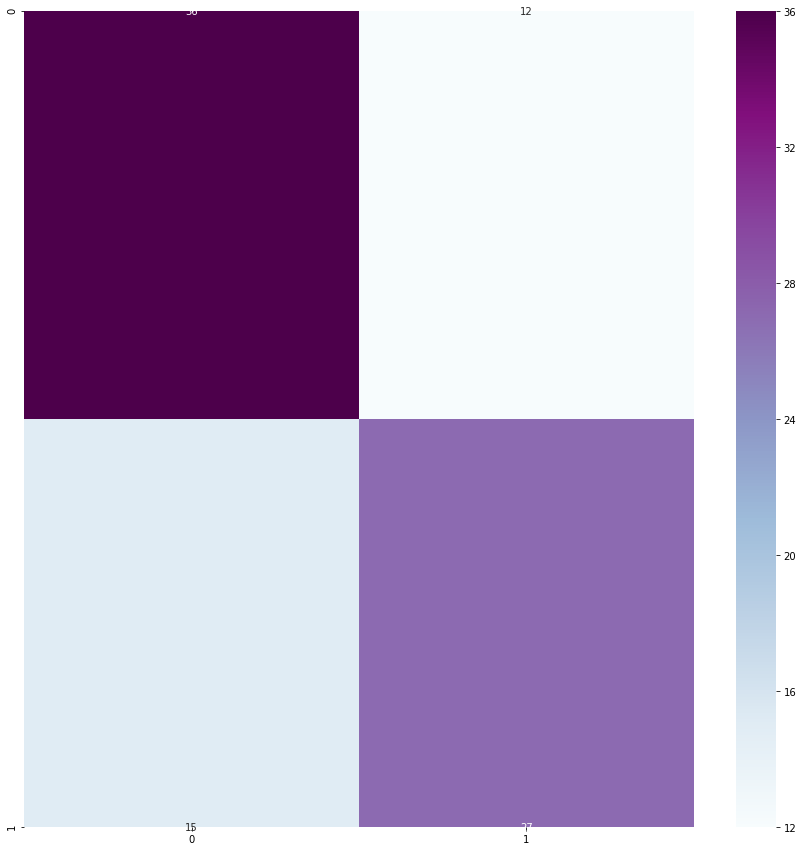

In [44]:
score_NB = cross_val_score(NB, X_train, y_train, cv=10)
score_NB
print("Точност-score NB: %0.2f" % (score_NB.mean()))
y_NB_pred = cross_val_predict(NB, X_test, y_test, cv=10)
mNB = confusion_matrix(y_test, y_NB_pred)
print(mNB)
sns.heatmap(mNB, annot=True,cmap='BuPu')
preci_NB = precision_score(y_test, y_NB_pred)
print("Прецизност NB: %0.2f" % preci_NB)
sensi_NB = recall_score(y_test, y_NB_pred)
print("Чувствителност NB: %0.2f" % sensi_NB)
f1_NB = f1_score(y_test, y_NB_pred)
print("F1 NB: %0.2f" % f1_kNN)
proba_NB = cross_val_predict(NB, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Откако ќе биде направена вкрстена валидација го добиваме следното:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 36</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 27</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 12</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување -15</li>
</ul>
Се добиваат полоши резултати, кога станува збор за презност, чувтвителнот и f1-score, меѓутоа точноста(accuracy) се зголемува на 0.84

#### Learning curve

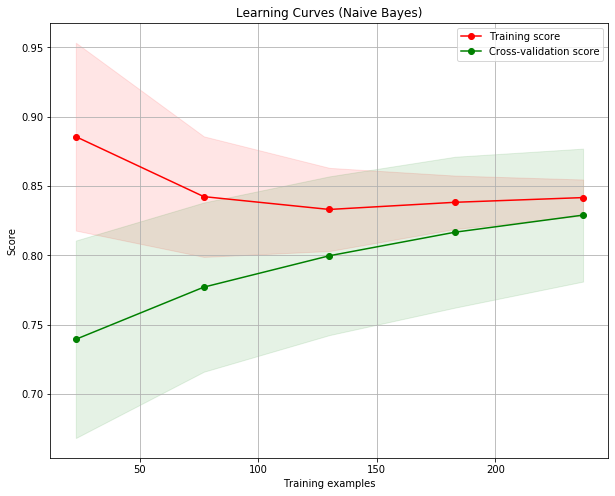

In [45]:
title = "Learning Curves (Naive Bayes)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = NB
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Кога имаме помал број на податоци за тестирање (testing samples) точноста на trainging и testing кривите е голема , како што се зголемува бројот на testing samples точноста на двете криви се намлува и конвергира кон вредност помеѓу 0.80 и 0.85.<br>
<ul><li><i>Во идеален случај вредноста кон која конвергираат двете криви би требало да е 1, што значи high bais, и ова би можело да се подобри со собирање на уште примероци.</i></li></ul>

#### ROC Curve

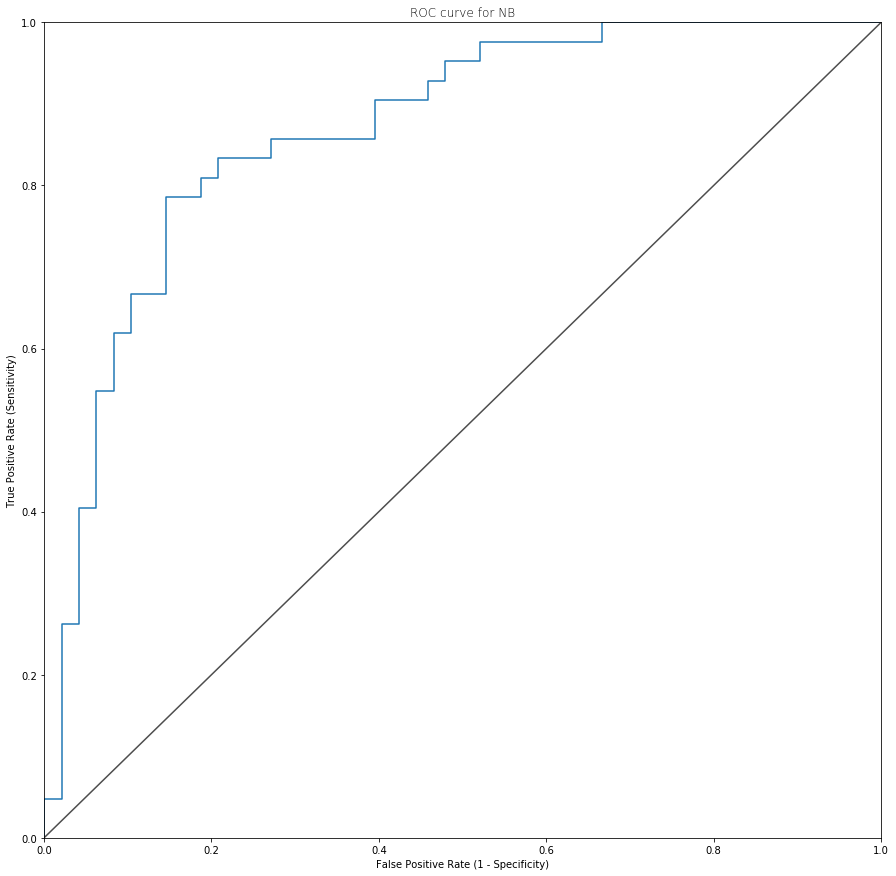

AUC Score : 0.8670634920634921


In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_NB = auc(fpr, tpr)
print("AUC Score :", auc_NB)

Без да направиме вкрстена валидација на дата сетот, AUC изнесува 0.867

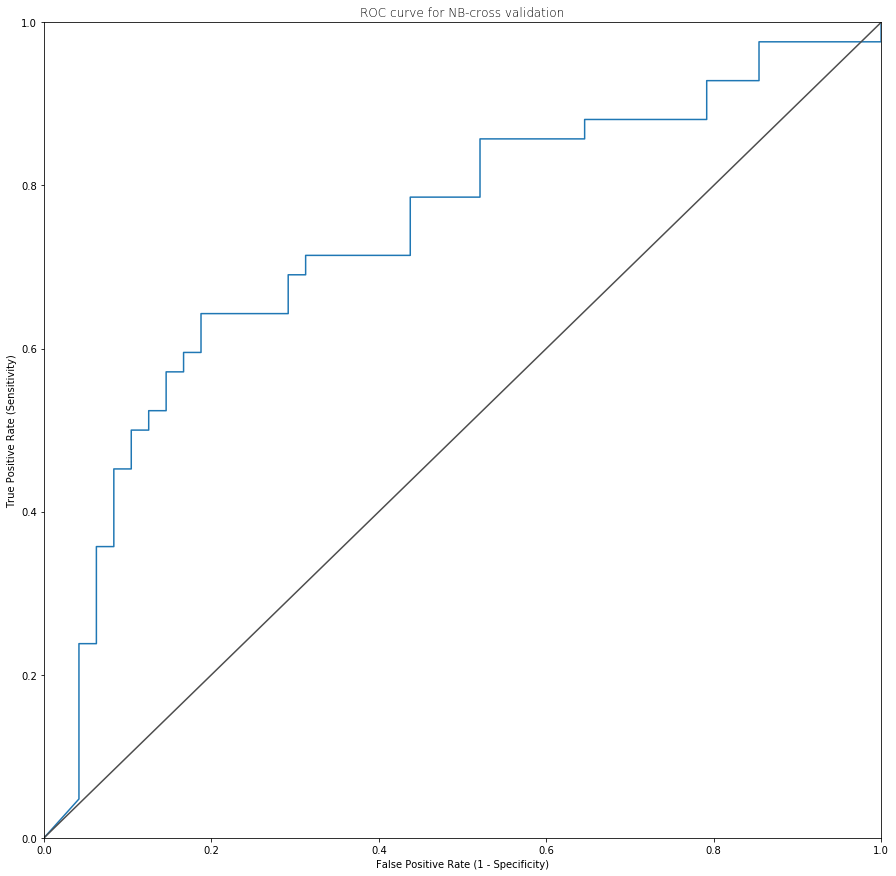

AUC Score : 0.7405753968253967


In [47]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_NB)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
from sklearn.metrics import auc
auc_NB_score = auc(fpr, tpr)
print("AUC Score :", auc_NB_score)

Откако ќе направиме вкрстена валидација на датасетот AUC се намалува на 0.740

#### Model tuning

За да добиеме подобар модел ќе го нагодиме хиперпараметарот var smoоthing, за тоа користиме grid search и добиваме вредност 0.23
<ul>
<li>Prior параметарот се однесува на prior probabilities, и ако се зададе некој вредност тогаш не се нагодува во однос на датасетот.</li><br>
<li> Var-smooting - додава некоја вредност на веќе постоечката варијасна на гаусовата распределба. Ова вредност ја измазнува кривата и овозможува на податоци кои се подалеку од средната вредност(пикот) да бидат земени во предвид.</li>
</ul>

In [48]:
nb_classifier = GaussianNB()
## prior - ako se zadade vrednnost, nema da bide nagoden spored dataset
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=nb_classifier, 
                     param_grid=params_NB, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_NB.fit(X_train, y_train);
gs_NB.best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   10.0s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'var_smoothing': 0.23101297000831597}

In [49]:
gs_NB2 = GaussianNB(priors = None,var_smoothing=0.23101297000831597)
gs_NB2.fit(X_train, y_train);
prediction_NB_tuned = gs_NB2.predict(X_test)
y_pred_quant_NB_tuned = gs_NB2.predict_proba(X_test)[:, 1]

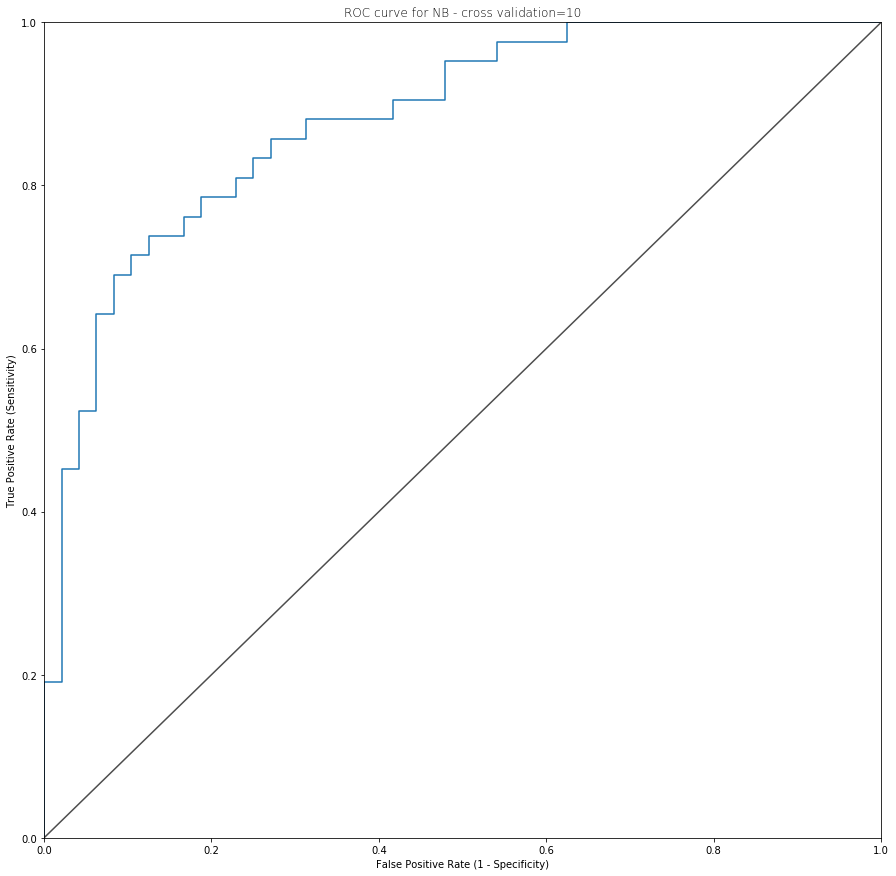

AUC Score : 0.8804563492063492


In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_NB_tuned)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for NB - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_NB_tuned = auc(fpr, tpr)
print("AUC Score :", auc_NB_tuned)

Со нагодување на хипер параметарот добуваме вредност што за АUC што е поголема во однос на другите две(без и со вкрстена валидација) <br> <i> За нагодување на параметарот исто така користиме вкрстена валидација со вредност 10</i>

### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report

In [52]:
LR = LogisticRegression()
model_LR = LR.fit(X_train,y_train)
prediction_LR = model_LR.predict(X_test)
y_pred_quant_LR = model_LR.predict_proba(X_test)[:, 1]

In [53]:
print(accuracy_score(y_test,prediction_LR))
confusion_matrix(y_test, prediction_LR)

0.7777777777777778


array([[39,  9],
       [11, 31]], dtype=int64)

Довиваме точност од 0.778 меѓутоа оваа точност(accuracy) само по себе не е доволна, поради тоа ќе исцртаме ROC крива подолу. Од confusion matrix можеме да заклучиме дека:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 39</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 31</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 9</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување -11</li>
</ul>

In [54]:
print(classification_report(y_test, prediction_LR))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80        48
           1       0.78      0.74      0.76        42

    accuracy                           0.78        90
   macro avg       0.78      0.78      0.78        90
weighted avg       0.78      0.78      0.78        90



#### Cross-Validation

Точностscore LR: 0.87
[[38 10]
 [13 29]]
Прецизност LR: 0.74
Чувствителност LR: 0.69
F1 LR: 0.72


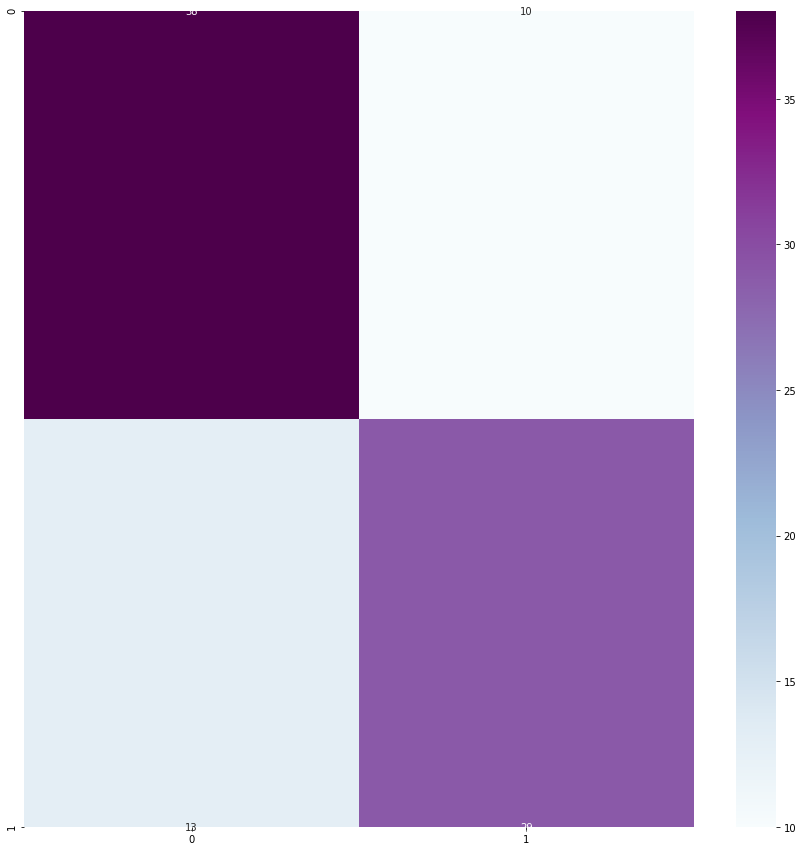

In [55]:
score_LR = cross_val_score(LR, X_train, y_train, cv=10)
score_LR
print("Точностscore LR: %0.2f" % (score_LR.mean()))
y_LR_pred = cross_val_predict(LR, X_test, y_test, cv=10)
mLR = confusion_matrix(y_test, y_LR_pred)
print(mLR)
sns.heatmap(mLR, annot=True,cmap='BuPu')
preci_LR = precision_score(y_test, y_LR_pred)
print("Прецизност LR: %0.2f" % preci_LR)
sensi_LR = recall_score(y_test, y_LR_pred)
print("Чувствителност LR: %0.2f" % sensi_LR)
f1_LR = f1_score(y_test, y_LR_pred)
print("F1 LR: %0.2f" % f1_LR)
proba_LR = cross_val_predict(LR, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Од како ќе направиме вкрстена валидација ги добиваме следните вредности:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 38</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 29</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 10</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување -13</li>
</ul>
Добиваме релативно полоши резултати за confusion matrix исто се случува и со точноста која се намалува на 0.87 како и прецизност, чувствителност и f1 score

#### Validation Curve

[[0.90862944 0.83838384 0.85929648]
 [0.9035533  0.85353535 0.86934673]
 [0.91370558 0.85353535 0.88442211]
 [0.91370558 0.85353535 0.89447236]
 [0.91878173 0.85353535 0.89949749]
 [0.92385787 0.85858586 0.89949749]
 [0.92385787 0.86363636 0.89949749]
 [0.92385787 0.86363636 0.89447236]
 [0.91878173 0.86868687 0.89949749]
 [0.91370558 0.86363636 0.89949749]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]
 [0.91878173 0.86363636 0.89447236]]
[[0.7        0.7979798  0.76530612]
 [0.69       0.80808081 0.73469388]
 [0.69       0.80808081 0.71428571]
 [0.68       0.80808081 0.71428571]
 [0.68       0.80808081 0.7244898 ]
 [0.67       0.80808081 0.7244898 ]
 [0.66       0.80808081 0.70408163]
 [0.66       0.80808081 0.69387755]
 [0.66       0.80808081 0.69387755]
 [0.66       0.80808081 0.68367347]
 [0.66       0.80808081 0.68367347]
 [0.66       0.81818182 0.68367347]
 [0.66       0.81818182 0.6

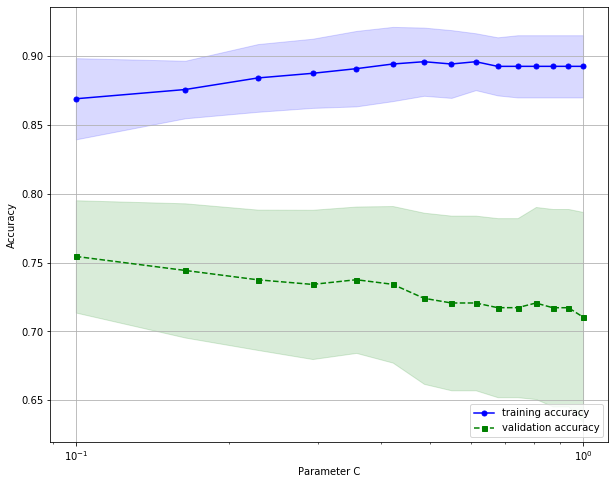

In [56]:
from sklearn.model_selection import validation_curve

param_name = "C"
param_range = np.linspace(.1, 1.0, 15)

train_scores, valid_scores = validation_curve(LR, 
                                              X, 
                                              y, 
                                              param_name,
                                              param_range)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


Од графикот може да се забележи дека за мали вредниости на параметарот C двете криви се поблиску една до друга, а со зголемување на неговата вредност растојанието помеѓу двете криви се зголемува, притоа вредноста на training score се зголемува, а на validation score опаѓа - overfiting. Моделот има добар перформанс на веќе видени податоци, меѓутоа не и на нови.

#### Learning Curve

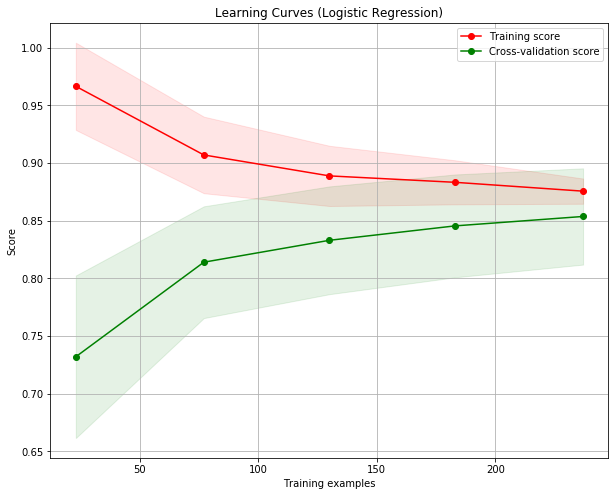

In [57]:
title = "Learning Curves (Logistic Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LR
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

На почетокот кога имаме помал број на training samples, точноста (accuracy) e поголема, како што се зголемеува бројот, точноста на traing score опаѓа, меѓутоа се зголемува точноста на validation score. Посакуаната (идална) вредност на перформансот е 1, од сликата се забележува дека двете криви конвергираат кон 0.87 (High Bias Learning Curve). Тоа би значело недостаток на карактеристики (features).

#### ROC Curve

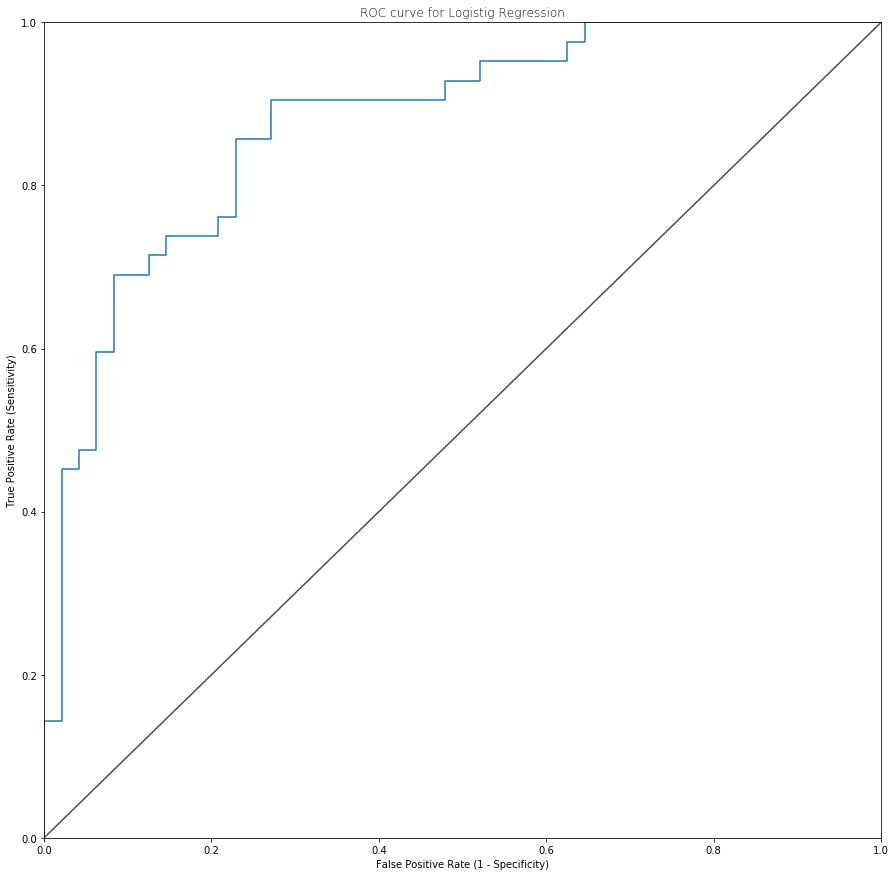

AUC Score : 0.876984126984127


In [58]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_LR)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_LR = auc(fpr, tpr)
print("AUC Score :", auc_LR)

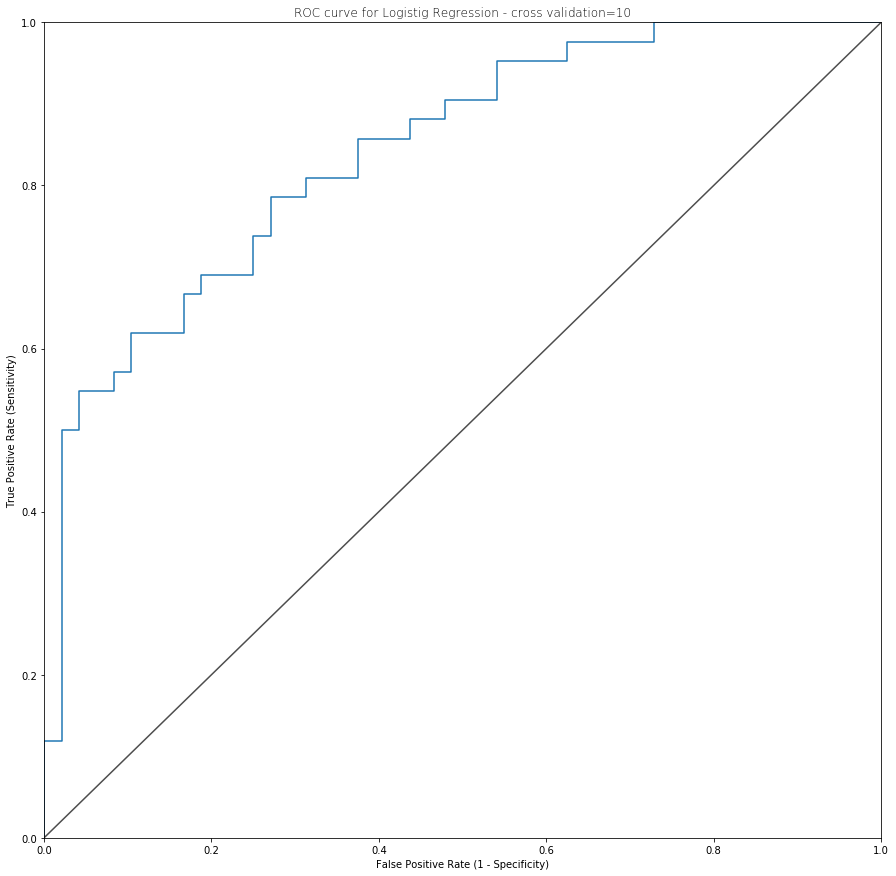

AUC Score : 0.8407738095238095


In [59]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_LR)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_LR_score = auc(fpr, tpr)
print("AUC Score :", auc_LR_score)

Без вкрстена валидација вредноста за AUC изнесува околу 0.877, додека со вкрстена валидација изнесува 0.840, што значи дека опаќа, меѓутоа се очекува дека моделот е подобро истрениран и дава подобри предвидување на не видени податоци.

### Tuning parametars

За подобар перформанс ги нагодуваме хиперпараметрите и за таа цел користиме grid search и вкртена валидација со вреднист 10.<br>
Со помош на penalty и solver се постигнува регуларизирана логистичка регресија.</br>
l1 и l2 ги редуцираат/намалуваат коефициентите на логистичка регрсија, со што се намалува варијансата на моделот.<br>
За penalty со вреднoст l1 не може да се користи newton-cg solver, додека за penalty : l2 не може да се користи linearlib.<br>
Multi-class параметарот се однеусва на тоа дали станува збор за мултикласен проблем или за бинарен, ovr-бинарен проблем. <br>
<i>Во овој случај grid search како solver избира newton-cg кој најчесто се корсти за мулти класни проблеми, иако станува збор за бинарна класификација </i>

In [60]:
grid= [{  "C":np.logspace(-3,3,7),
        'multi_class':["ovr", "multinomial"],
            'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],#l1-lasso
            'penalty': ['l2'], 'solver': ['newton-cg','lbfgs','sag', 'saga'],#l2-ridge
        "max_iter":[100,1000,2500,5000]   
      }]
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 100, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.8743961352657005


In [61]:
LR_tuned=LogisticRegression(C=0.1,max_iter=100,penalty="l2", solver= 'newton-cg')
LR_tuned.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_pred_LR_tuned = LR_tuned.predict(X_test)
y_pred_quant_LR_tuned =LR_tuned.predict_proba(X_test)[:, 1]

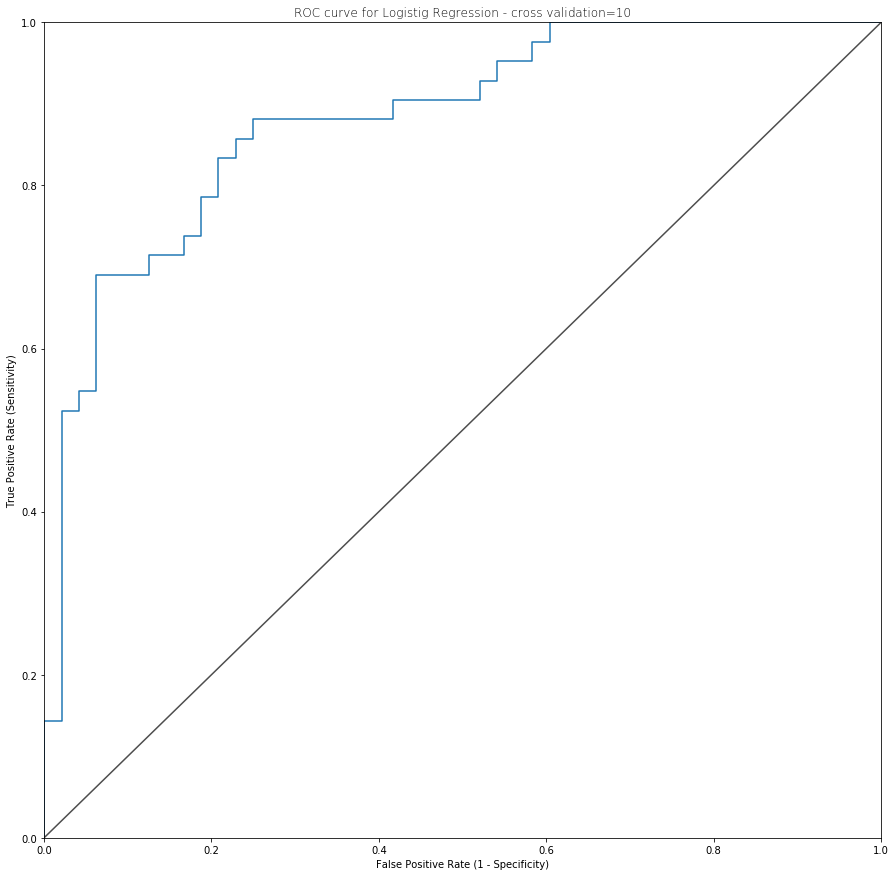

AUC Score : 0.8814484126984128


In [63]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_quant_LR_tuned)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Logistig Regression - cross validation=10', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


from sklearn.metrics import auc
auc_LR_tuned = auc(fpr, tpr)
print("AUC Score :", auc_LR_tuned)

Вредноста по нагодување на хипер параметрите е многу за AUC изнесува 0.881 што е значително подобра од претходните две

###  Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DTC = DecisionTreeClassifier()
model_DTC = DTC.fit(X_train,y_train)
prediction_DTC = model_DTC.predict(X_test)
y_pred_quant_DTC = model_DTC.predict_proba(X_test)[:, 1]

In [66]:
print(accuracy_score(y_test,prediction_DTC))
confusion_matrix(y_test, prediction_DTC)

0.6777777777777778


array([[34, 14],
       [15, 27]], dtype=int64)

<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 36</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 28</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 12</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување -14</li>
</ul>
    Добиваме точност (аccuracy) од 0.71

In [67]:
print(classification_report(y_test, prediction_DTC))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70        48
           1       0.66      0.64      0.65        42

    accuracy                           0.68        90
   macro avg       0.68      0.68      0.68        90
weighted avg       0.68      0.68      0.68        90



#### Validation Curve

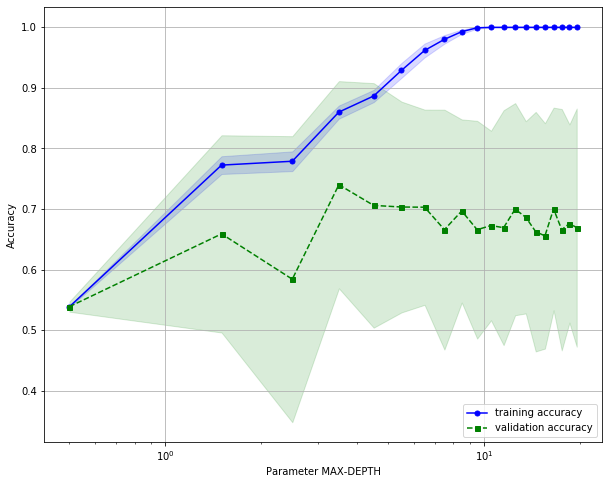

In [68]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = "max_depth"
param_range = np.arange(0.5, 20)
cv=10

train_scores, valid_scores = validation_curve(DTC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv
                                               )
(train_scores)
(valid_scores)

train_mean = np.mean(train_scores, axis=1);
train_std = np.std(train_scores, axis=1);

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter MAX-DEPTH')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


 Од графикот се гледа дека за вредности на max-depth помеѓу 1 и 10 имаме поблиски вредности на trainig score и validation score. <br> Со зголемување на вредноста на параметарот над 10 добиваме големо растојание помеѓу двете криви, training score достигнува вредност 1, додека validation score се движи околу 0.68 - overfitting

#### Cross-validation

Точност-score DTC: 0.76
[[34 14]
 [18 24]]
Прецизност DTC: 0.69
Чувствителност DTC: 0.57
F1 DTC: 0.60


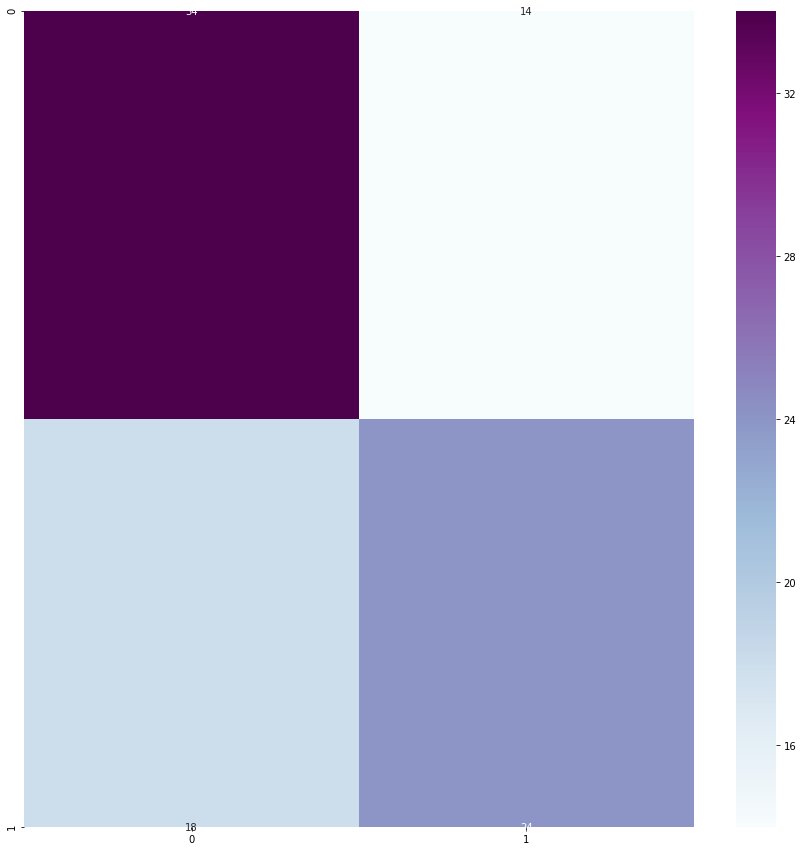

In [69]:
score_DTC = cross_val_score(DTC, X_train, y_train, cv=10)
score_DTC
print("Точност-score DTC: %0.2f" % (score_DTC.mean()))
y_DTC_pred = cross_val_predict(DTC, X_test, y_test, cv=10)
mDTC = confusion_matrix(y_test, y_DTC_pred)
print(mDTC)
sns.heatmap(mDTC, annot=True,cmap='BuPu')
preci_DTC = precision_score(y_test, y_DTC_pred)
print("Прецизност DTC: %0.2f" % preci_NB)
sensi_DTC = recall_score(y_test, y_DTC_pred)
print("Чувствителност DTC: %0.2f" % sensi_DTC)
f1_DTC = f1_score(y_test, y_DTC_pred)
print("F1 DTC: %0.2f" % f1_DTC)
proba_DTC = cross_val_predict(DTC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

По вкрстена валидација од confusion matrix заклучуваме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 34</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 23</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 14</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 19</li>
</ul>
Точноста (accuracy) e 0.75 што е поголема од претходната (0.71), иако се намалуваат вредностите за чувствителност, прецизност и f1-score

#### Learning Curve

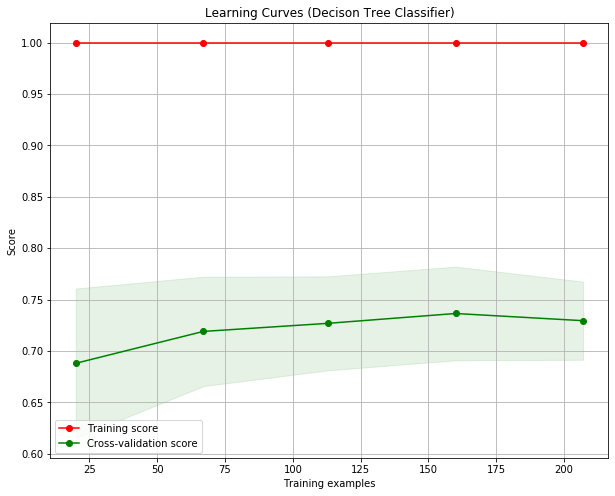

In [70]:
title = "Learning Curves (Decison Tree Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 30% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
estimator = DTC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Од графикот забележуваме дека вредноста на traning score останува 1 без разлика колкав е бројот на податоци, меѓутоа вредноста на validation score дава многу помала точност, за вредности помали од 100 traning samples точноста е околу 0.69, додека за вредности поголеми од 100 training samples, точноста изнесува 0.78 и останува иста со понатамошно зголемување - overfitting, Кривите не конвергираат кон една вредност со зголемување на бројот на податоци high variance curve.

#### ROC Curve

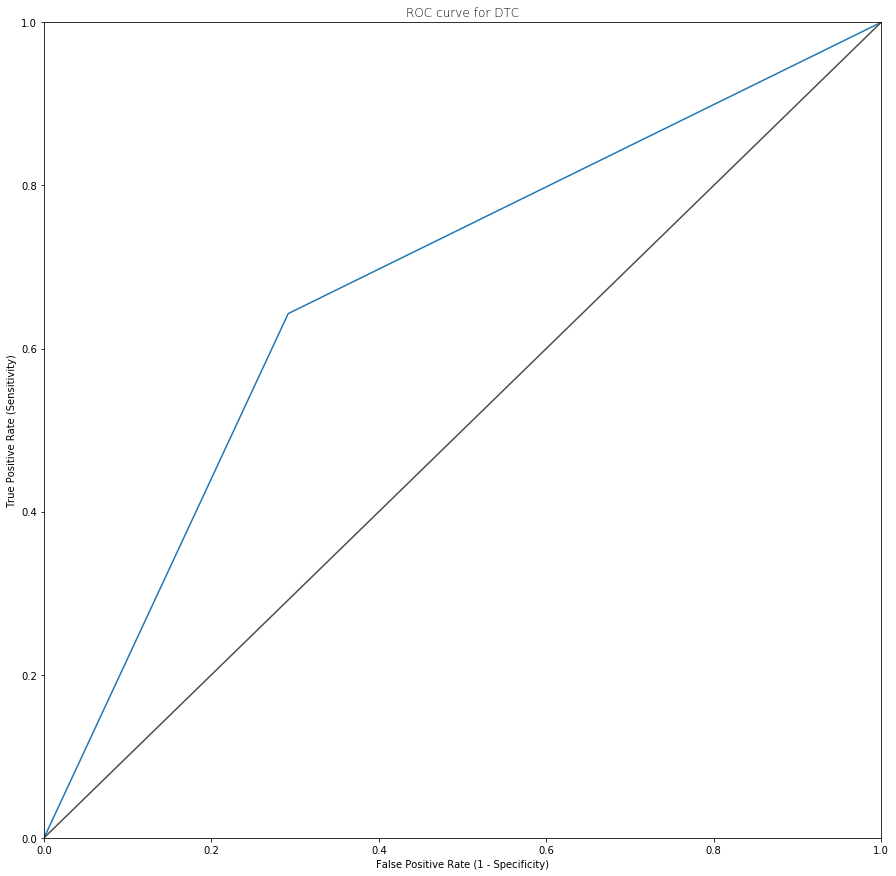

AUC Score : 0.675595238095238


In [71]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC = auc(fpr, tpr)
print("AUC Score :", auc_DTC)

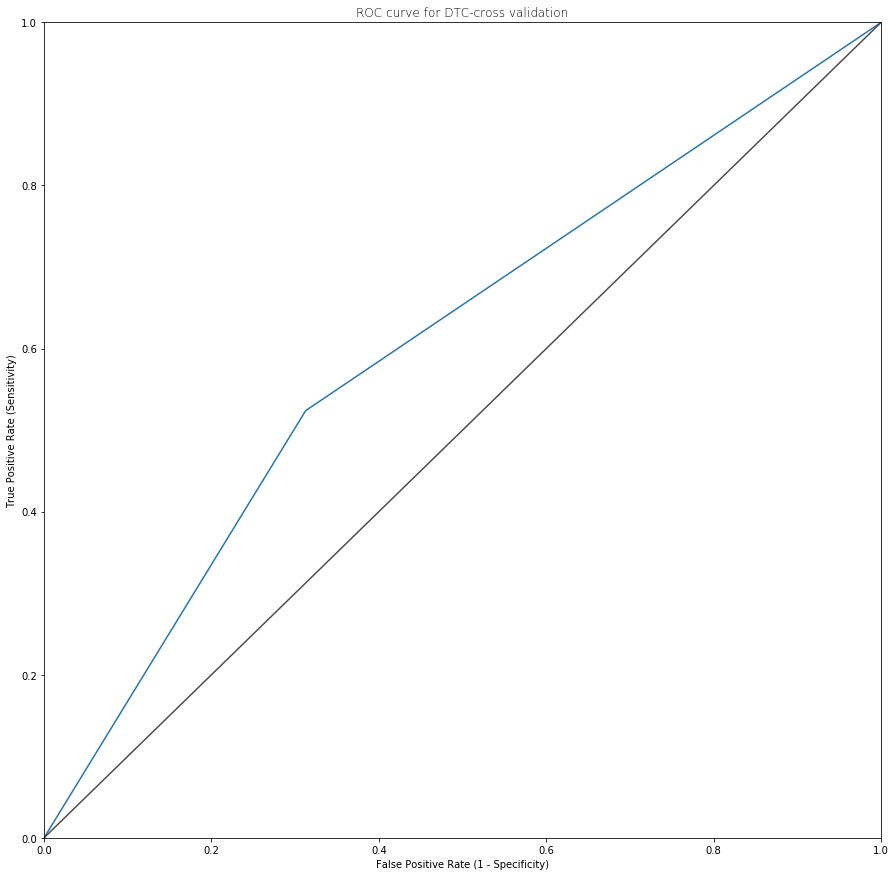

AUC Score : 0.6056547619047619


In [72]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_DTC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC_score = auc(fpr, tpr)
print("AUC Score :", auc_DTC_score)

Вредноста на AUC без користење на вкстена валидација изнесува 0.708, додека со користење на вкстена валидација се намалува на околу 0.63

In [73]:
from sklearn.tree import DecisionTreeClassifier

df_classifier = DecisionTreeClassifier(random_state=999)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
             'min_samples_split': [2, 3]}

gs_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=10,
                     verbose=1, 
                     scoring='accuracy')

gs_DT.fit(X_train, y_train);

Fitting 10 folds for each of 32 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    3.3s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [74]:
gs_DT.best_params_

{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}

Ги нагодуваме хипер параметрите criterion, max_depth, min_samples_split со користење на вкрстена валидација и Grid seacrh.

In [75]:
from sklearn.tree import DecisionTreeClassifier
dfc_tuned = DecisionTreeClassifier(criterion= 'gini', max_depth = 1, min_samples_split = 2)
dfc_tuned.fit(X_train, y_train)
y_pred_DT_tuned =dfc_tuned.predict(X_test)
y_pred_quant_DT_tuned = dfc_tuned.predict_proba(X_test)[:, 1]

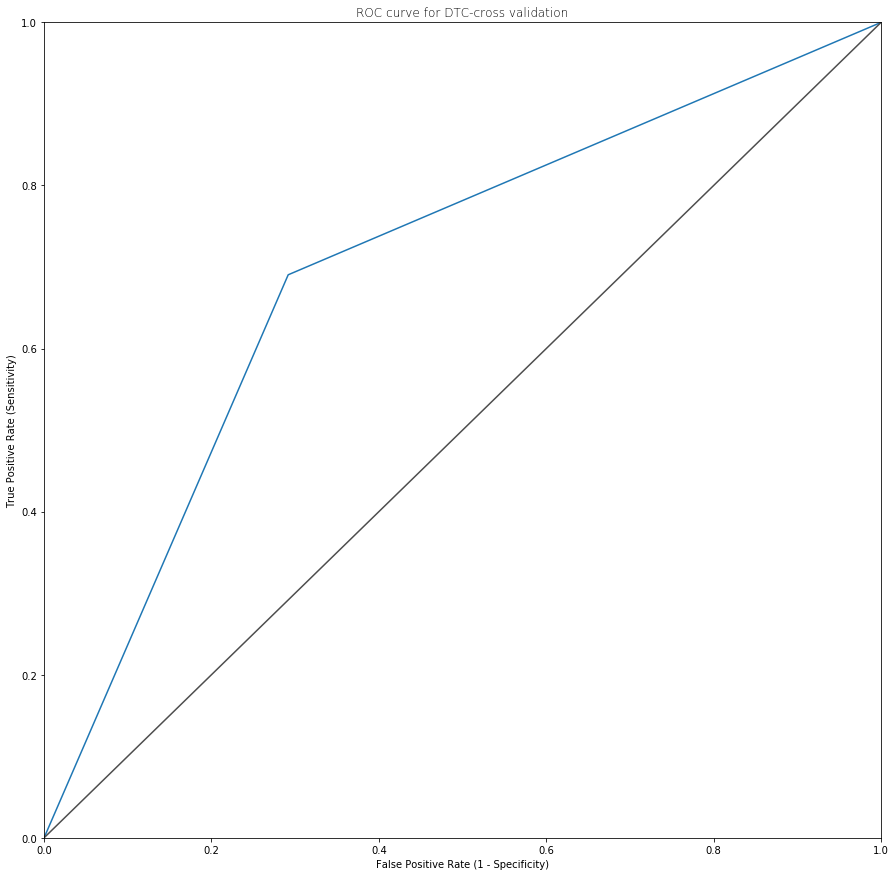

AUC Score : 0.6994047619047619


In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_DT_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for DTC-cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_DTC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_DTC_tuned)

Со вака нагодени параметри добиваме вредност за AUC од околу 0.7

### Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
RFC = RandomForestClassifier()
model_RFC = RFC.fit(X_train,y_train)
prediction_RFC = model_RFC.predict(X_test)
y_pred_quant_RFC = model_RFC.predict_proba(X_test)[:, 1]

In [79]:
print(accuracy_score(y_test,prediction_RFC))
confusion_matrix(y_test, prediction_RFC)

0.7777777777777778


array([[40,  8],
       [12, 30]], dtype=int64)

Од consfusion matrix може да се заклучи следново:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 35</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 30</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 13</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 12</li>
</ul>

Точноста(accuracy) изнесува 0.72 само со фитување на податоците во моделот.

#### Validation Curve

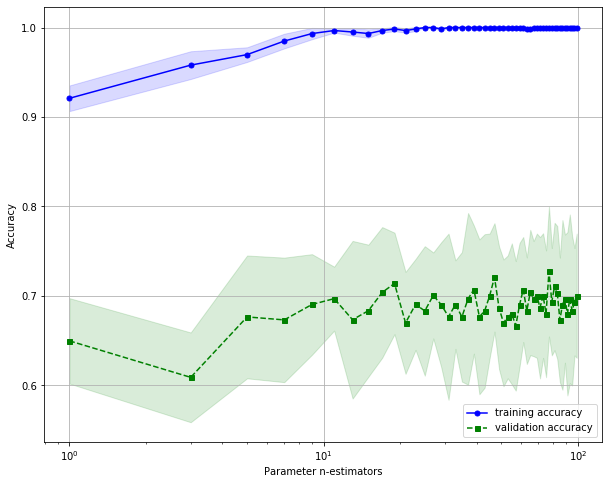

In [80]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name = 'n_estimators'
param_range = np.arange(1, 100, 2)
cv=3

train_scores, valid_scores = validation_curve(RFC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=-1
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter n-estimators')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


Validation curve исцртуваме во однос на параметарот n-estimators, кој кореспондира на бројот на дрва во radnom forest. 
<ul>
    <li>За вредности на параметарот од 1 до 10, training score има прилично добра вредност, меѓутоа validation score иако расте како што се зголемува вредноста параметарот е сепак многу низок, ова значи дека моделот добро ги препознава податоците на кои е трениран, но на нови податоци дава лоши перформанси - overfit</li>
    <li>За вредности на параметарот поголеми од 10, training score достига 1, но  сепак validation score останува прилично низок околу 0.7, важи истото од погоре - overfit</li>
</ul>

#### Cross-Validation

Точност-score RFC: 0.87
[[37 11]
 [16 26]]
Прецизност RFC: 0.70
Чувствителност RFC: 0.62
F1 RFC: 0.66


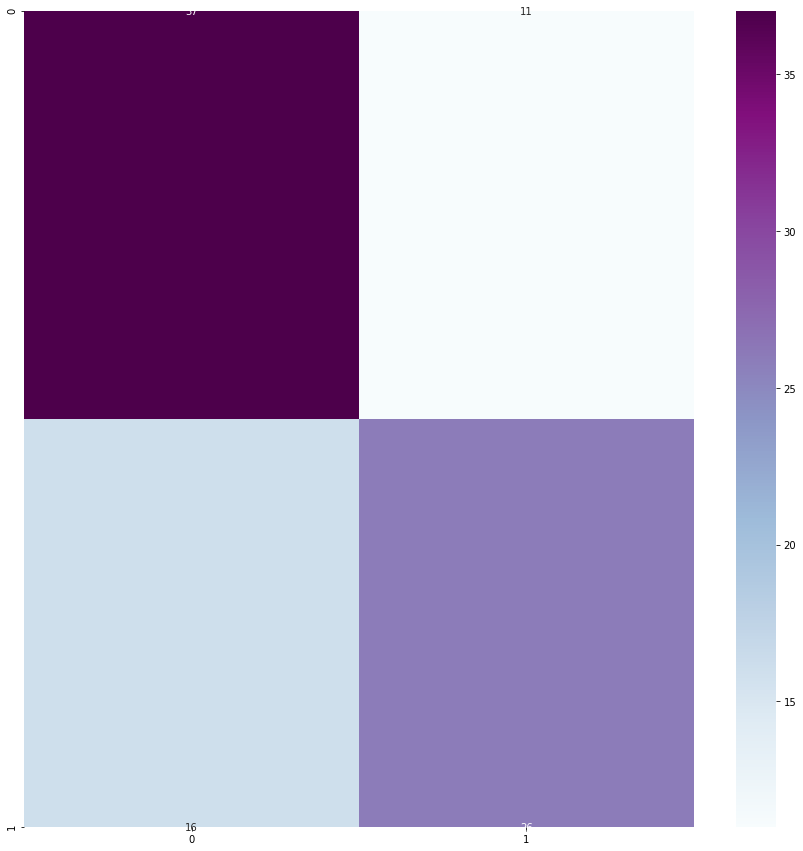

In [81]:
score_RFC = cross_val_score(RFC, X_train, y_train, cv=10)
score_RFC
print("Точност-score RFC: %0.2f" % (score_RFC.mean()))
y_RFC_pred = cross_val_predict(RFC, X_test, y_test, cv=10)
mRFC = confusion_matrix(y_test, y_RFC_pred)
print(mRFC)
sns.heatmap(mRFC, annot=True,cmap='BuPu')
preci_RFC = precision_score(y_test, y_RFC_pred)
print("Прецизност RFC: %0.2f" % preci_RFC)
sensi_RFC = recall_score(y_test, y_RFC_pred)
print("Чувствителност RFC: %0.2f" % sensi_RFC)
f1_RFC = f1_score(y_test, y_RFC_pred)
print("F1 RFC: %0.2f" % f1_RFC)
proba_RFC = cross_val_predict(RFC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Од consfusion matrix по вксрстена валидација, може да се заклучи следново:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 37</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 22</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 11</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 20</li>
</ul>
Предвидувањето е полошо отколку без користење на вксрстена валидација

Точноста(accuracy) изнесува 0.85 по користење на вкретсна валидација што е значително подобро од претходно.

#### Learning Curve

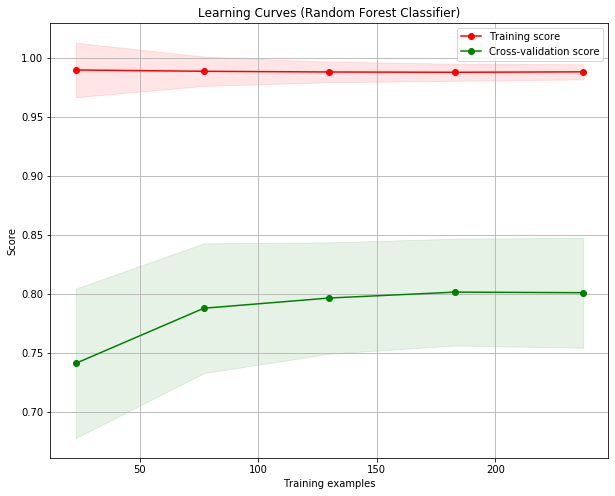

In [82]:
title = "Learning Curves (Random Forest Classifier)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = RFC
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

Како што го зголемуваме бројот на примероци така се зголемува и validation score и достигува вредност од 0.81, додека training score достигнува точност 1 без разлика на бројот на птимероци. Јазот помеѓу овие две криви е голем што значи дека ова е High Bias Learning Curve.

#### ROC Curve

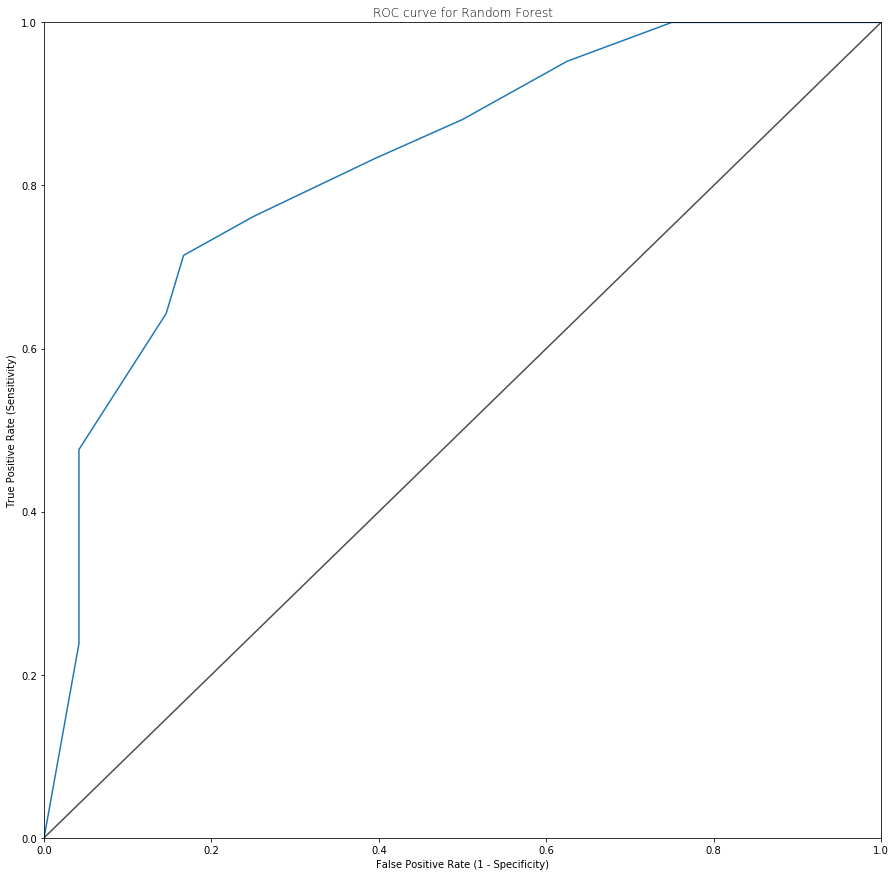

AUC Score : 0.8311011904761905


In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Random Forest', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC = auc(fpr, tpr)
print("AUC Score :", auc_RFC)

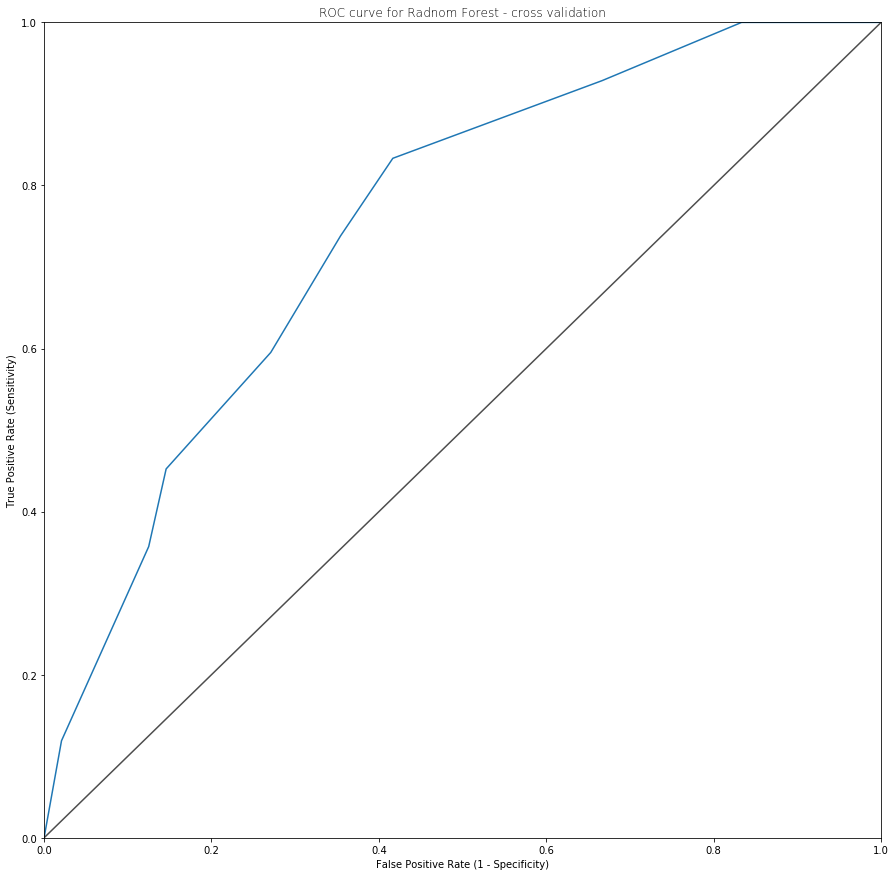

AUC Score : 0.7522321428571428


In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_RFC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Radnom Forest - cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC_score = auc(fpr, tpr)
print("AUC Score :", auc_RFC_score)

Како и претходно, со користење на вкрстена валидација, вредноста на AUC се намулува од околу 0.83 на околу 0.75

#### Model tunning

Параметарот
<ul> <li>max_depth се однесува на максималната длабочина на дрвата,</li> <li>max_features се однесува на максималниот прој на каректеристики земени во предвид при барање на најдобра поделба,</li> <li>n_estimators- број на дрва,</li>  <li>min_samples_split - минимален број на примероци за да се направи поделба од јазол</li>

In [85]:
rf_params = {"max_depth": [2,5,8,10],
            "max_features": [2,3,5,7],
            "n_estimators": [10,100,200,500,1000],
            "min_samples_split": [2,5,10]}

In [86]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv = 10, 
                           n_jobs = -1, 
                           verbose = 2) 

In [87]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 21.1min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 26.3min finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [88]:
print("Best Parameters: " + str(rf_cv_model.best_params_))

Best Parameters: {'max_depth': 2, 'max_features': 3, 'min_samples_split': 10, 'n_estimators': 100}


Како оптимални параметри добиваме длабочина на дрва од 2, максимален број на карактеристики од 3, минимален број на примероци за поделба од 10, и број на дрва 500

In [89]:
rf_tuned = RandomForestClassifier(max_depth = 2, 
                                  max_features = 3, 
                                  min_samples_split = 2,
                                  n_estimators = 100)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
y_pred_rf_tuned = rf_tuned.predict(X_test)
y_pred_quant_rf_tuned = rf_tuned.predict_proba(X_test)[:, 1]

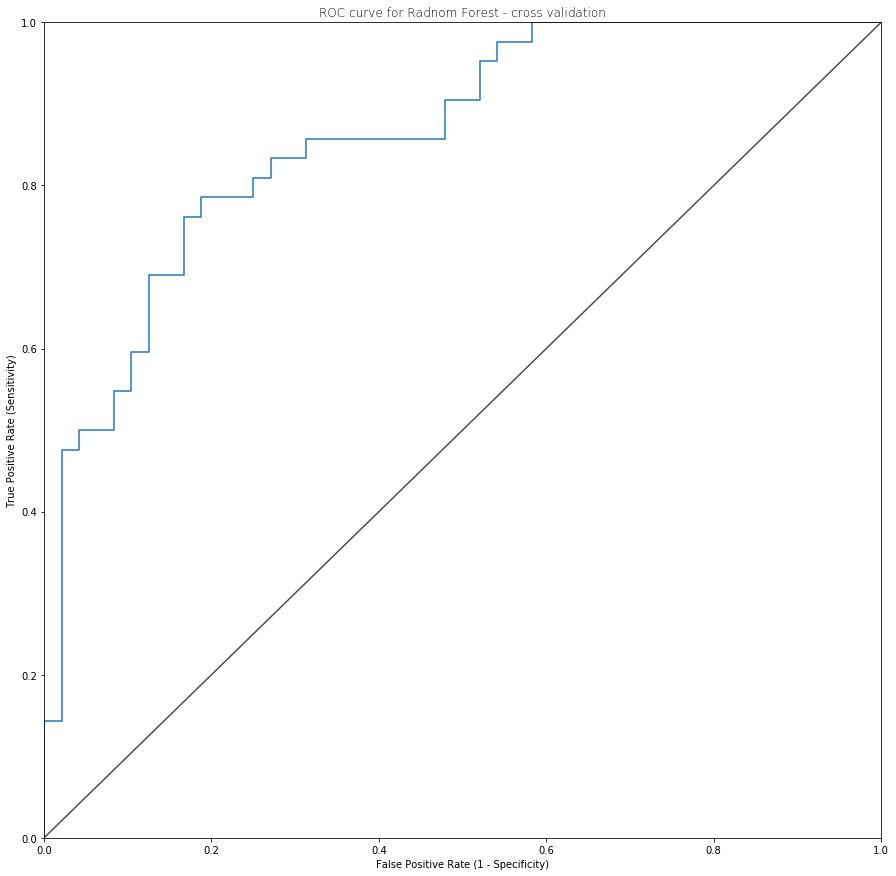

AUC Score : 0.8606150793650794


In [91]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_quant_rf_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for Radnom Forest - cross validation', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_RFC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_RFC_tuned)

Со вака нагодени параметри добиваме AUC со вредност 0.865 што е најдобро, во споредба со претходните резултати.

### Support Vector Machines

Користиме 3 типа на kernels:
<ul>
    <li>RBF</li>
    <li>Linear</li>
    <li>Poly</li>
</ul>

#### 1. RBF

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.svm import SVC
SVC = SVC(probability=True, kernel="rbf")
model_SVC = SVC.fit(X_train,y_train)
prediction_SVC = model_SVC.predict(X_test)
y_pred_quant_SVC = model_SVC.predict_proba(X_test)[:, 1]

In [93]:
print(accuracy_score(y_test,prediction_SVC))
confusion_matrix(y_test, prediction_SVC)

0.8


array([[39,  9],
       [ 9, 33]], dtype=int64)

 Од confusion matrix можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 39</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 33</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 9</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 9</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.8.

####  Validation Curve

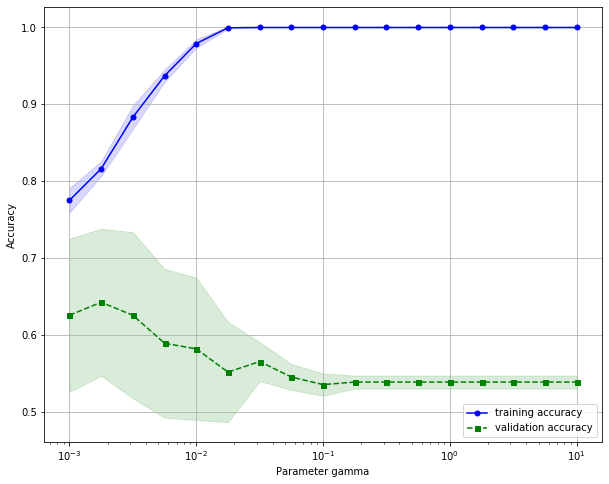

In [94]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold


param_name="gamma"
cv = StratifiedKFold(10)
param_range = np.logspace(-3, 1, 17)

train_scores, valid_scores = validation_curve(SVC, 
                                               X, 
                                               y, 
                                               param_name,
                                               param_range,
                                               cv=cv,
                                               scoring="accuracy", 
                                               n_jobs=8
                                               )
train_scores
valid_scores

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter gamma')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()


За вредности на параметарот гама:
<ul>
    <li>помали од 0.01 до 0.1 вредноста на validation score се намалува, додека на traning score се зголемува -overfitting</li>
    <li>поголеми од 0.1 вредноста на validation score се стационира на 1, додека на training score на околу 0.55 што е многу низок скор -overfitting</li>
</ul>
Моделот дава добри резултати на веќе видени податоци, но не и на невдени.

#### Cross validation

Точност-score RFC: 0.86
Прецизност SVC: 0.81
Чувствителност SVC: 0.62
F1 SVC: 0.70


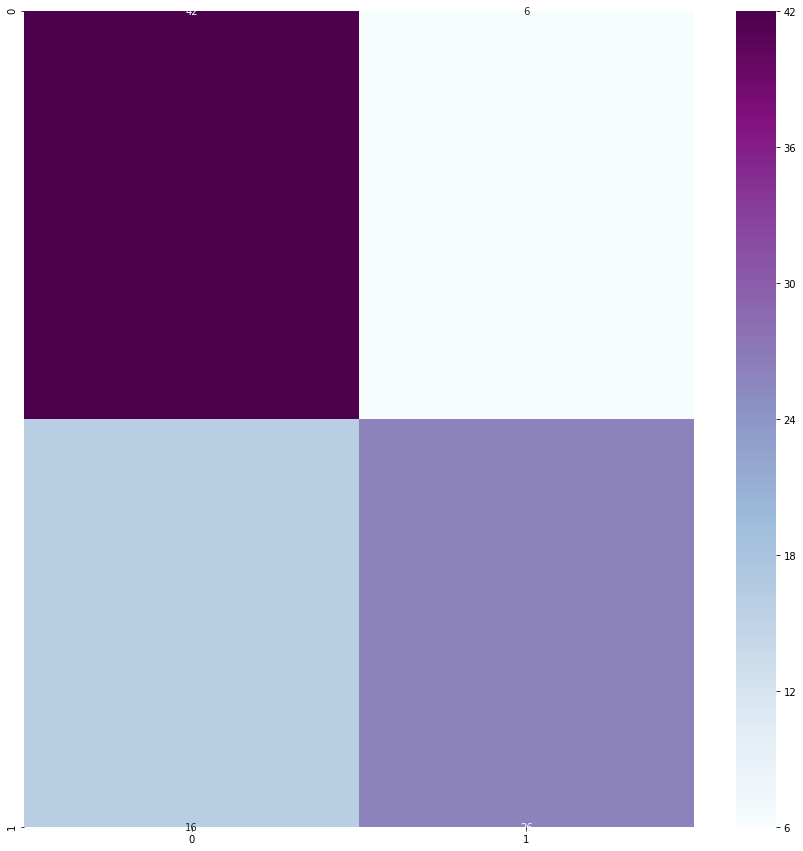

In [95]:
score_SVC = cross_val_score(SVC, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC.mean()))
y_SVC_pred = cross_val_predict(SVC, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC = cross_val_predict(SVC, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Од confusion matrix по воведување вкрстена валидација можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 42</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 26</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 6</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 16</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.86.

#### Learning Curve

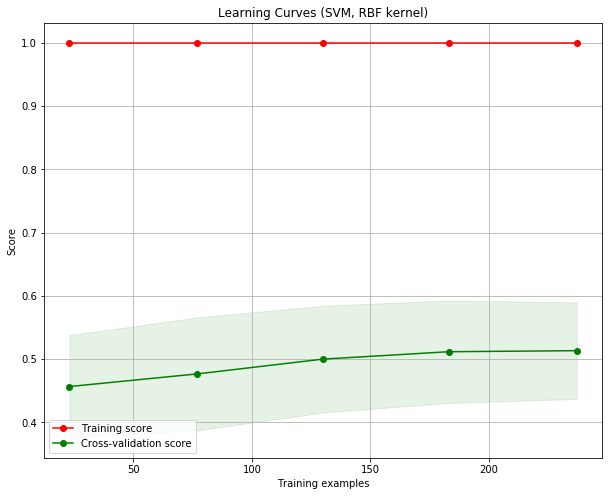

In [96]:
title = r"Learning Curves (SVM, RBF kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC
plot_learning_curve(estimator, title, X, y,
                    cv=cv, n_jobs=4)

plt.show()

Од графикот заклучуваме дека:
<ul>
    <li>Без разлика на бројот на примероци validation score e 1</li>
    <li>Со зголемување на бројот на примероци training score кој на почеток е доста низок (0.55) расте, а за број на примероци поголем од 180 тој се стационира околу 0.61</li>
    <li>Ова би значело дека нашиот модел има висока варијанса(собирање на уште податоци и/или намалување на комплексноста)</li>
 </ul>

#### ROC Curve

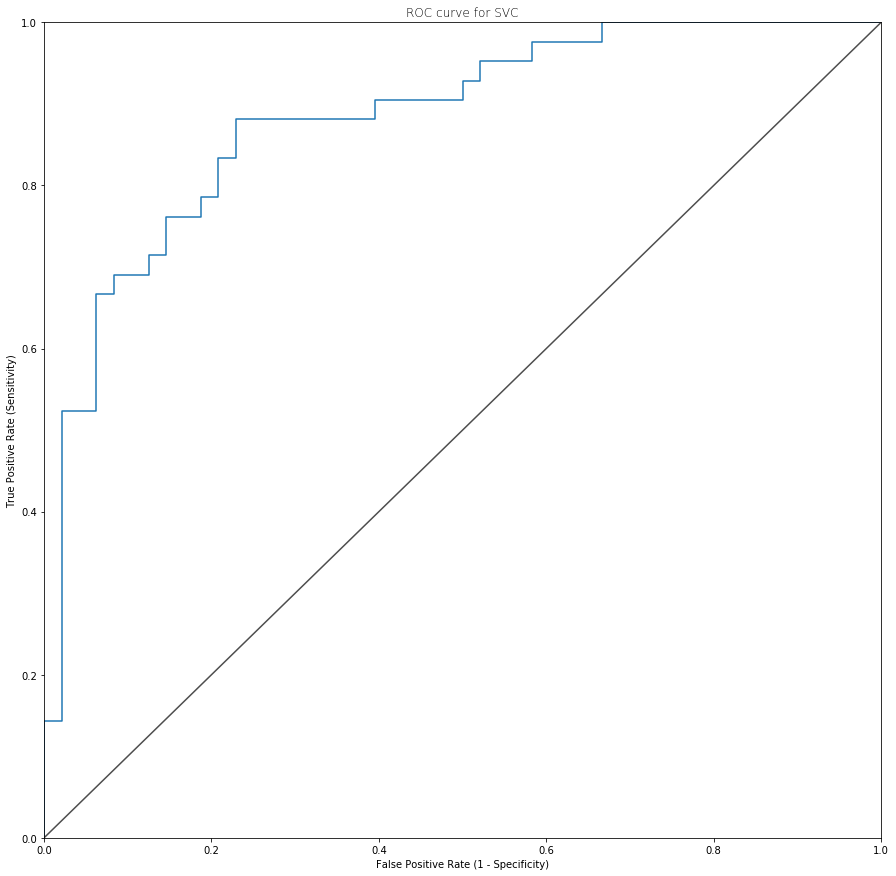

AUC Score : 0.8824404761904762


In [97]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC = auc(fpr, tpr)
print("AUC Score :", auc_SVC)

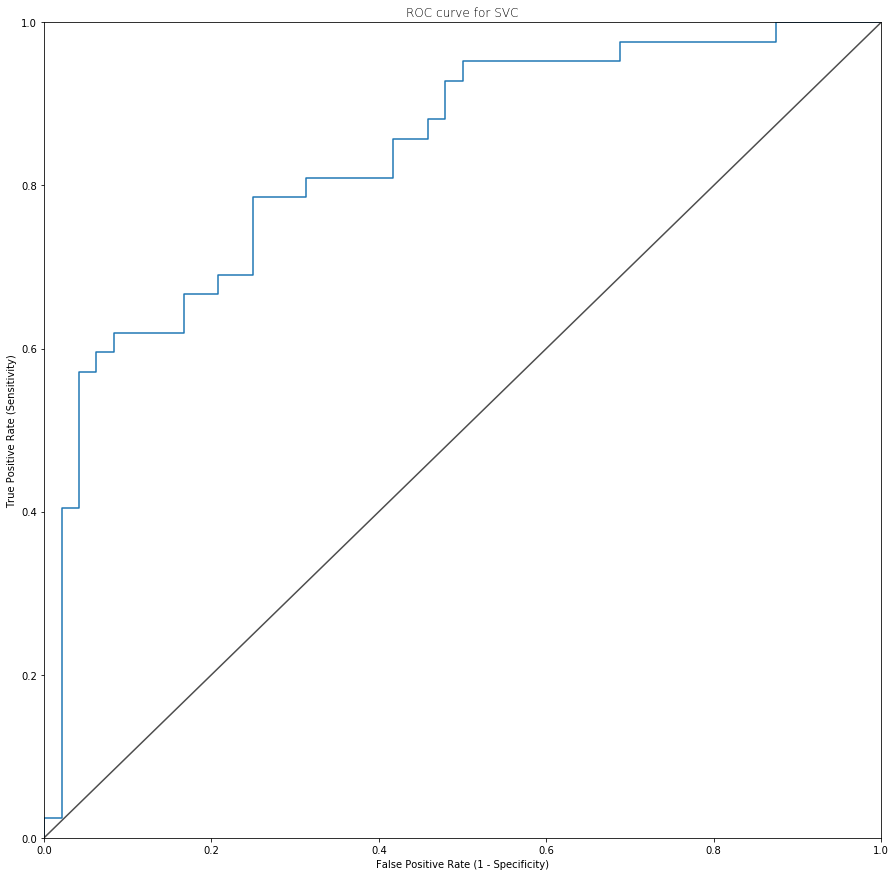

AUC Score : 0.8348214285714285


In [98]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,proba_SVC)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_score = auc(fpr, tpr)
print("AUC Score :", auc_SVC_score)

При споредба на двете вредности за AUC (без вкрстена валидација и со вкрстена валидација) забележуваме дека моделот без вв. дава подобри резултати (0.882)  во однос на тој со вв. (0.834).

#### Model tunning

При користење на овој kernel имаме два коефициенти кои треба да ги нагодиме C и гама.<br>
C- параметар на регуларизација<br>
gamma-kernel коефициент

In [99]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma":['scale','auto']}

svc_cv_model = GridSearchCV(SVC,svc_params, 
                            cv = 10, 
                            n_jobs = -1, 
                            verbose = 2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.8min finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [100]:
print("Best parameters: " + str(svc_cv_model.best_params_))

Best parameters: {'C': 5, 'gamma': 0.1}


In [101]:
from sklearn.svm import SVC
SVC1 = SVC(probability=True, kernel="rbf", C=5, gamma=0.1)
svc_tuned = SVC1.fit(X_train, y_train)

In [102]:
y_pred_svc = svc_tuned.predict(X_test)
y_pred_svc_tuned = svc_tuned.predict_proba(X_test)[:, 1]

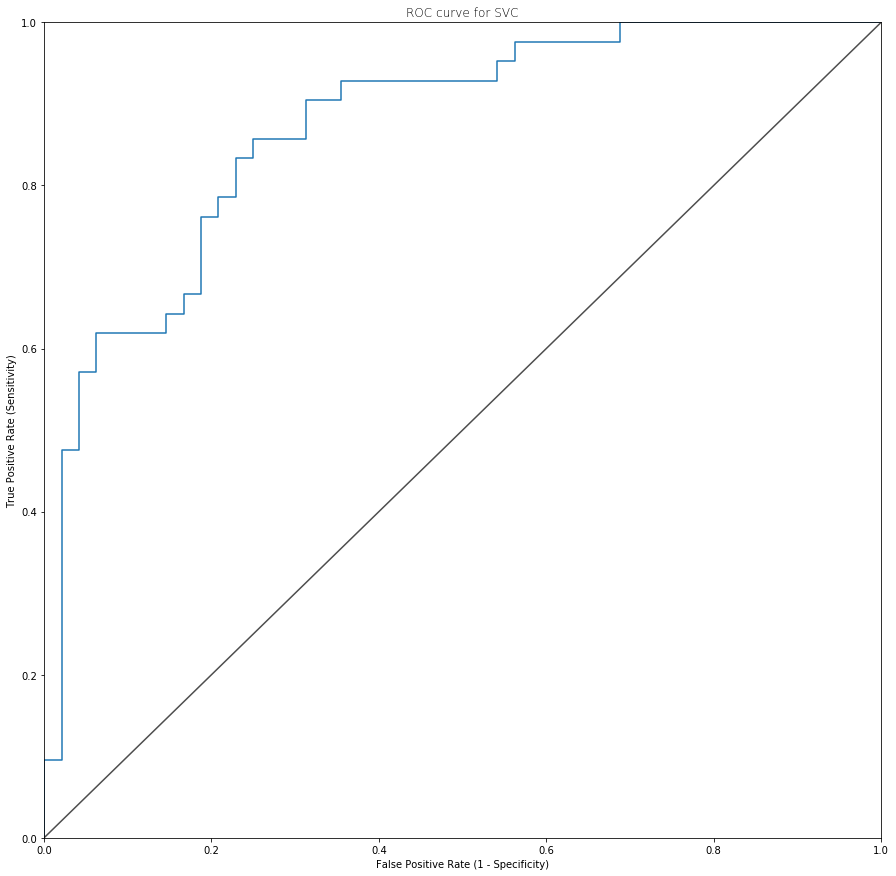

AUC Score : 0.8720238095238095


In [103]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test,y_pred_svc_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_tuned)

За AUC добиваме 0.872 што е подобро од вредноста со вв. но полошо од вредноста со вв, меѓутоа очекуваме дека поради нагодените параметри, моделот ќе напврави variance/bias trade off со што би имал подобри перформанци на невидени податоци.

#### 2. LINEAR

In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC_linear = SVC(probability=True, kernel="linear")
model_SVC_linear = SVC_linear.fit(X_train,y_train)
prediction_SVC_linear = model_SVC_linear.predict(X_test)
y_pred_quant_SVC_linear = model_SVC_linear.predict_proba(X_test)[:, 1]

In [105]:
print(accuracy_score(y_test,prediction_SVC_linear))
confusion_matrix(y_test, prediction_SVC_linear)

0.7666666666666667


array([[38, 10],
       [11, 31]], dtype=int64)

Од confusion matrix по воведување вкрстена валидација можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 38</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 31</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 10</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 11</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.76.

#### Validation Curve

In [106]:
# from sklearn.model_selection import validation_curve
# from sklearn.model_selection import StratifiedKFold


# param_name="C"
# cv = StratifiedKFold(10)
# param_range = np.logspace(0, 1, 5)

# train_scores, valid_scores = validation_curve(SVC_linear, 
#                                                X, 
#                                                y, 
#                                                param_name,
#                                                param_range,
#                                                cv=cv,
#                                                scoring="accuracy"
#                                                )
# train_scores
# valid_scores

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(valid_scores, axis=1)
# test_std = np.std(valid_scores, axis=1)

# plt.figure(figsize=(10,8))
# plt.plot(param_range, train_mean,
#          color='blue', marker='o',
#          markersize=5, label='training accuracy')
# plt.fill_between(param_range, train_mean + train_std,
#                  train_mean - train_std, alpha=0.15,
#                  color='blue')
# plt.plot(param_range, test_mean,
#          color='green', linestyle='--',
#          marker='s', markersize=5,
#          label='validation accuracy')
# plt.fill_between(param_range,
#                  test_mean + test_std,
#                  test_mean - test_std,
#                  alpha=0.15, color='green')
# plt.grid()
# plt.xscale('log')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter c')
# plt.ylabel('Accuracy')
# #plt.ylim([0.8, 1.0])
# plt.show()


#### Cross-validation

Точност-score RFC: 0.85
Прецизност SVC: 0.78
Чувствителност SVC: 0.76
F1 SVC: 0.77


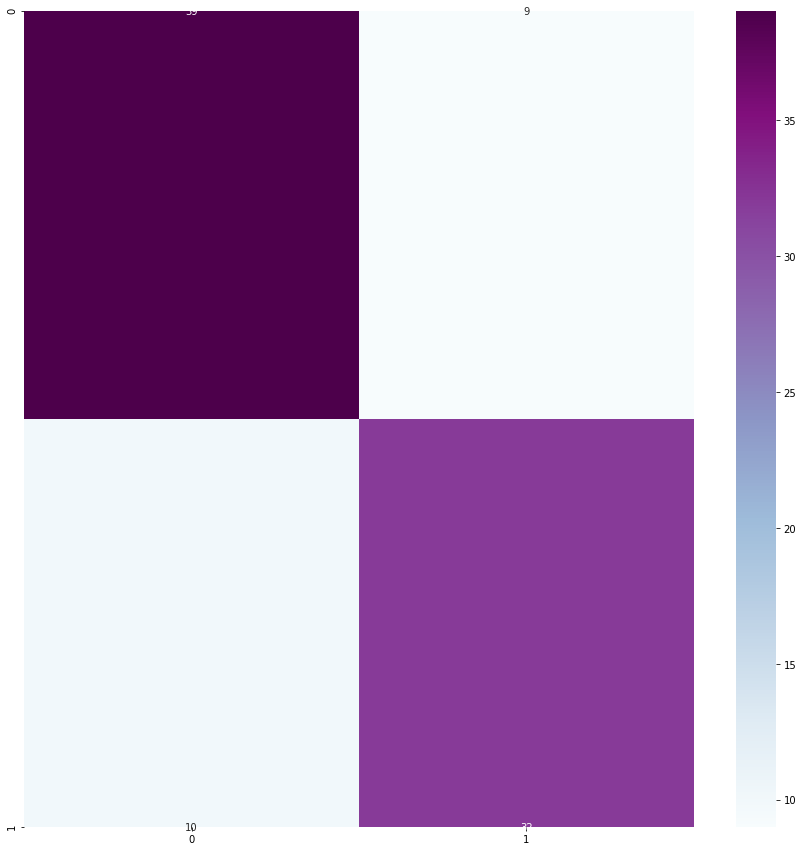

In [107]:
score_SVC_linear = cross_val_score(SVC_linear, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC_linear.mean()))
y_SVC_pred_linear = cross_val_predict(SVC_linear, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred_linear)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred_linear)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred_linear)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred_linear)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC_linear = cross_val_predict(SVC_linear, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Од confusion matrix по воведување вкрстена валидација можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 39</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 32</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 9</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 10</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.86.

#### Learning Curve

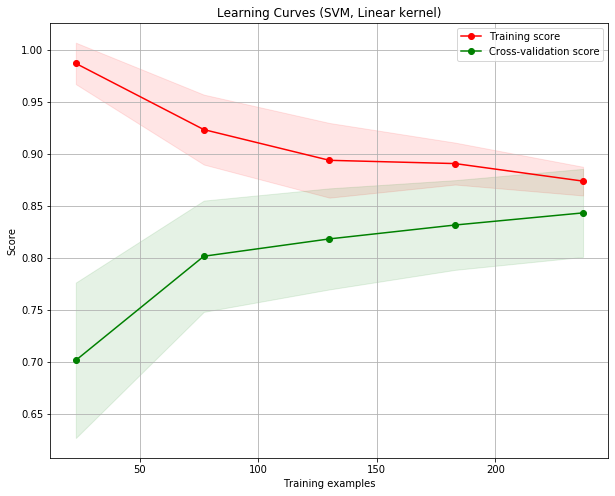

In [108]:
title = r"Learning Curves (SVM, Linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC_linear
plot_learning_curve(estimator, title, X, y,
                    cv=cv, n_jobs=4)

plt.show()

<ul>
    <li>Вредноста на training score се намалува со зголемување на бројот на податоци, а на validation score расте, што е добар облик на Learining curve</li>
    <li>Меѓутоа и двете криви се стационораат околу 0.85, а во најдобар случај би требало да се стационираат околу 1, ова би значело high bias, low variance</li>
</ul>

#### ROC curve

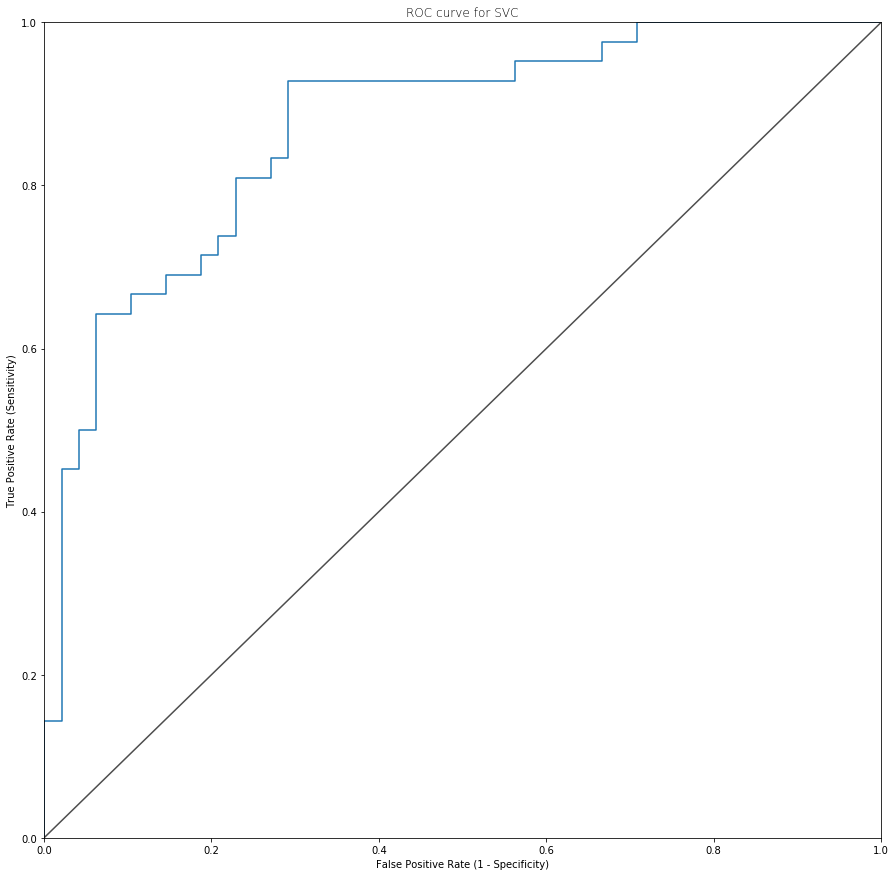

AUC Score : 0.8705357142857143


In [109]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC_linear)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear)

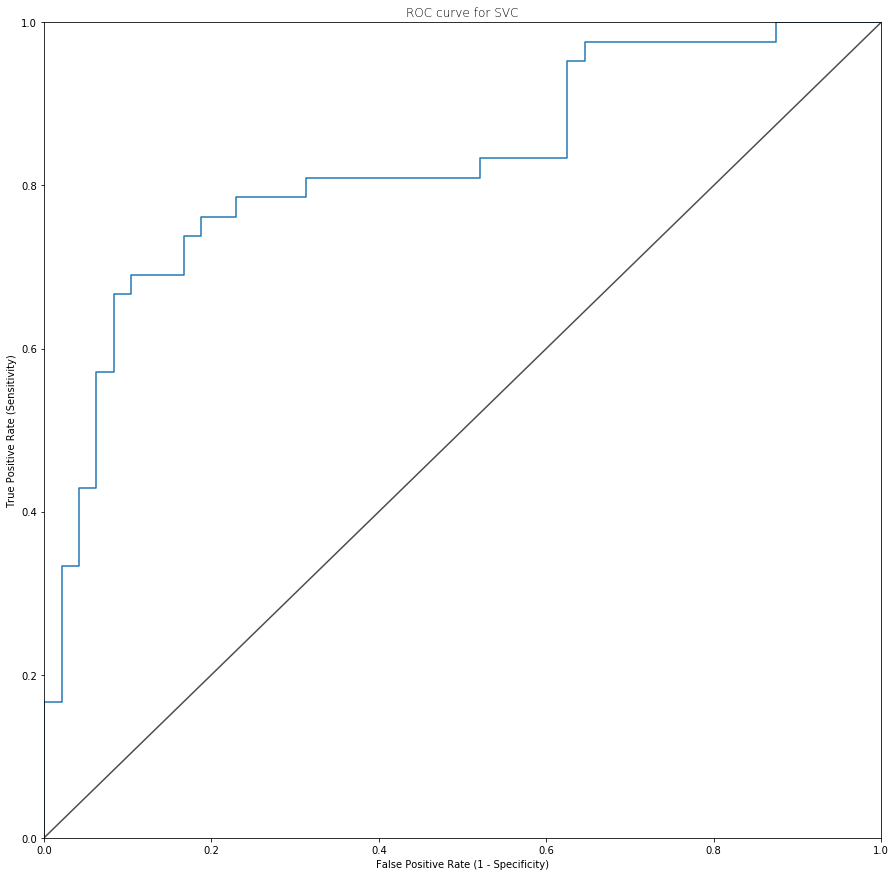

AUC Score : 0.8249007936507936


In [110]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_SVC_linear)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear_cross = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear_cross)

Со користење на вкрстена валидација вредноста на AUC се намалува од 0.87 на 0.825.

#### Model tuning

In [111]:
svc_params = {"C": [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
             
svc_cv_model = GridSearchCV(SVC_linear, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.9s


Best parameters: {'C': 0.1}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   20.5s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [112]:
from sklearn.svm import SVC
svc_tuned_linear = SVC(probability=True,kernel = "linear", C = 0.1).fit(X_train, y_train)
y_pred_linear = svc_tuned_linear.predict(X_test)
y_pred_svc_linear_tuned = svc_tuned_linear.predict_proba(X_test)[:, 1]

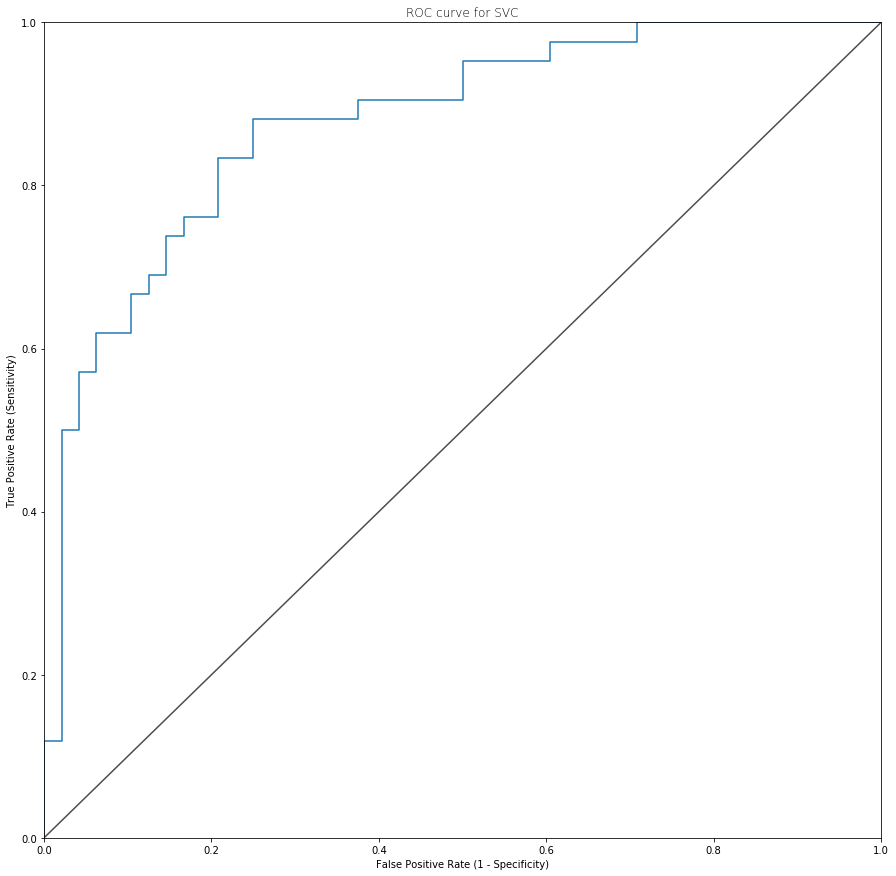

AUC Score : 0.8764880952380952


In [113]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_linear_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_linear_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_linear_tuned)

Во овој случај го нагодуваме само параметарот C и добиваме AUC од 0.876

#### 3. POLY

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
SVC_poly = SVC(probability=True, kernel="poly")
model_SVC_poly = SVC_poly.fit(X_train,y_train)
prediction_SVC_poly = model_SVC_poly.predict(X_test)
y_pred_quant_SVC_poly = model_SVC_poly.predict_proba(X_test)[:, 1]

In [115]:
print(accuracy_score(y_test,prediction_SVC_poly))
confusion_matrix(y_test, prediction_SVC_poly)

0.6


array([[47,  1],
       [35,  7]], dtype=int64)

Од confusion matrix по воведување вкрстена валидација можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 47</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 7</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 1</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 35(необично голем број)</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.6.

#### Validation Curve

In [116]:
# from sklearn.model_selection import validation_curve
# from sklearn.model_selection import StratifiedKFold


# param_name="C"
# cv = StratifiedKFold(10)
# param_range = np.logspace(-1, 1, 5)

# train_scores, valid_scores = validation_curve(SVC_poly, 
#                                                X, 
#                                                y, 
#                                                param_name,
#                                                param_range,
#                                                cv=cv,
#                                                scoring="accuracy", 
#                                                n_jobs=8
#                                                )
# train_scores
# valid_scores

# train_mean = np.mean(train_scores, axis=1)
# train_std = np.std(train_scores, axis=1)

# test_mean = np.mean(valid_scores, axis=1)
# test_std = np.std(valid_scores, axis=1)

# plt.figure(figsize=(10,8))
# plt.plot(param_range, train_mean,
#          color='blue', marker='o',
#          markersize=5, label='training accuracy')
# plt.fill_between(param_range, train_mean + train_std,
#                  train_mean - train_std, alpha=0.15,
#                  color='blue')
# plt.plot(param_range, test_mean,
#          color='green', linestyle='--',
#          marker='s', markersize=5,
#          label='validation accuracy')
# plt.fill_between(param_range,
#                  test_mean + test_std,
#                  test_mean - test_std,
#                  alpha=0.15, color='green')
# plt.grid()
# plt.xscale('log')
# plt.legend(loc='lower right')
# plt.xlabel('Parameter gamma')
# plt.ylabel('Accuracy')
# #plt.ylim([0.8, 1.0])
# plt.show()


#### Cross-validation

Точност-score RFC: 0.57
Прецизност SVC: 0.00
Чувствителност SVC: 0.00
F1 SVC: 0.00


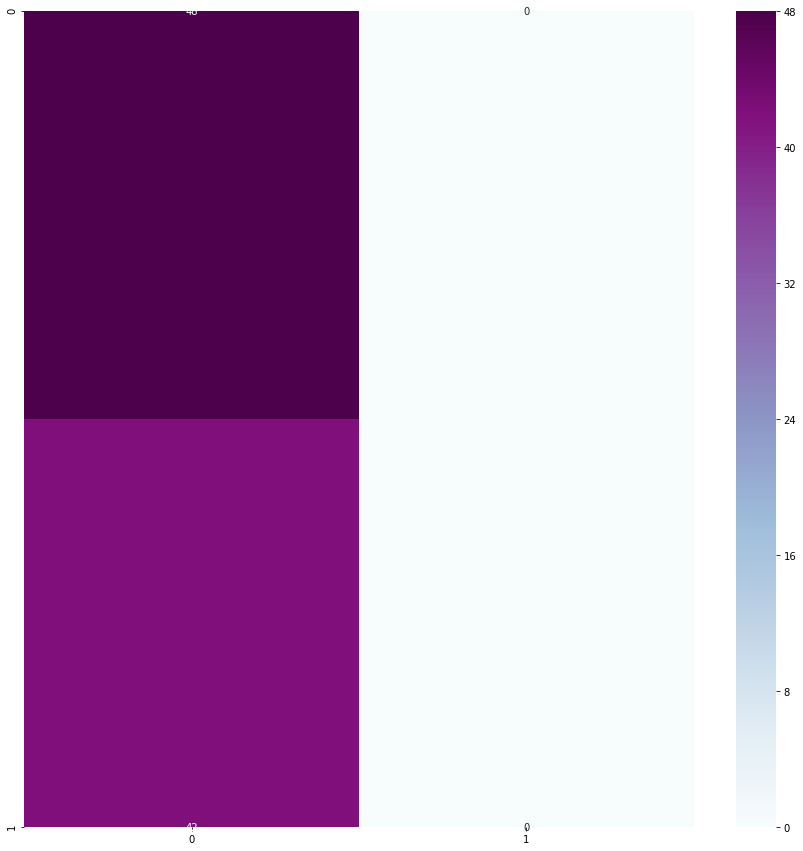

In [117]:
score_SVC_poly = cross_val_score(SVC_poly, X_train, y_train, cv=10)
print("Точност-score RFC: %0.2f" % (score_SVC_poly.mean()))
y_SVC_pred_poly = cross_val_predict(SVC_poly, X_test, y_test, cv=10)
mSVC = confusion_matrix(y_test, y_SVC_pred_poly)
sns.heatmap(mSVC, annot=True,cmap='BuPu')
preci_SVC = precision_score(y_test, y_SVC_pred_poly)
print("Прецизност SVC: %0.2f" % preci_SVC)
sensi_SVC = recall_score(y_test, y_SVC_pred_poly)
print("Чувствителност SVC: %0.2f" % sensi_SVC)
f1_SVC = f1_score(y_test, y_SVC_pred_poly)
print("F1 SVC: %0.2f" % f1_SVC)
proba_SVC_poly = cross_val_predict(SVC_poly, X_test, y_test, cv=10, method='predict_proba')[:, 1]

Од confusion matrix по воведување вкрстена валидација можеме да заклучиме:
<ul>
    <li>True negatives - пациенти кои немаат срцево заболување и се точно предвидени - 46</li>
    <li>True positivies - пациенти кои имаат срцево заболување и се точно предвидени - 0 (неприфатливо)</li>
    <li>False positives - пациенти кои имаат срцево заболување, а се предвидени како пациенти без срцево заболување - 0</li>
    <li>False negatives - пациенти кои немаат срцево заболување, а се предвидени како пациенити со срцево заболување - 42(неприфатливо)</li>
</ul>
Точноста(accuracy) без вкрстена валидација изнесува 0.57, катастрофални резултати за прецизност, чувстителност и f1-score.
Овој модел има убедливо лоши перформнаси.

#### Learning Curve

In [118]:
# # SVC is more expensive so we do a lower number of CV iterations:
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
# estimator = SVC_poly()
# plot_learning_curve(estimator, title, X, y,
#                     cv=cv, n_jobs=4)

# plt.show()

#### ROC curve

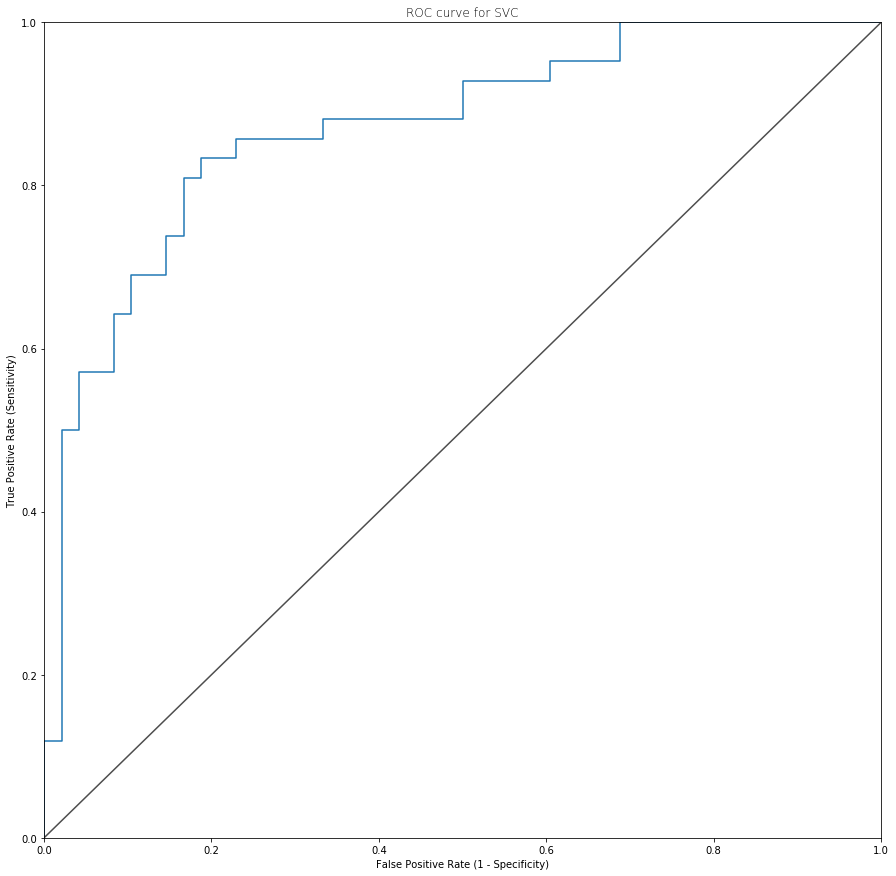

AUC Score : 0.8705357142857143


In [119]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant_SVC_poly)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly)

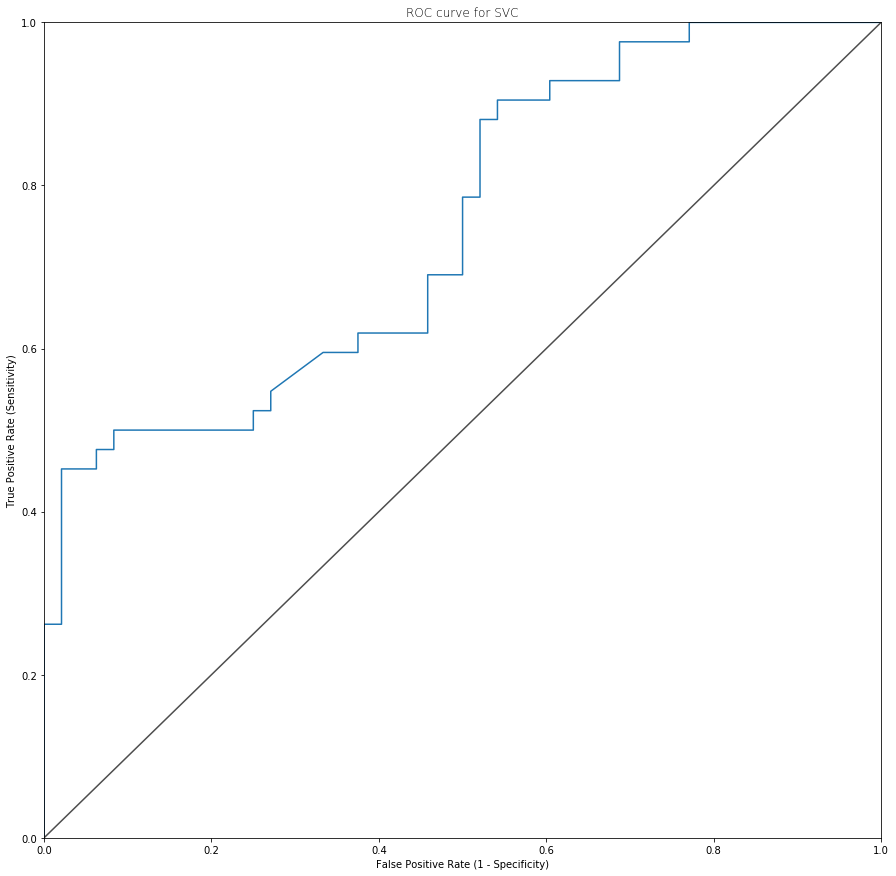

AUC Score : 0.7485119047619048


In [120]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, proba_SVC_poly)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly_cross = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly_cross)

Иако навидум според претходните заклучоци, изгледаше дека моделот дава лоши резултати за AUC добиваме подобри вредности, дури 0.87 без вв., и 0.748 со вв.

#### Model tuning

In [121]:
svc_params = {"C": [0.00001, 0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svc_cv_model = GridSearchCV(SVC_poly, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)
print("Best parameters: " + str(svc_cv_model.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.5s


Best parameters: {'C': 50}


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   26.3s finished
C:\Users\dimce\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [139]:
from sklearn.svm import SVC
svc_tuned_poly = SVC(probability=True,kernel = "poly", C = 50).fit(X_train, y_train)
y_pred_poly = svc_tuned_poly.predict(X_test)
y_pred_svc_poly_tuned = svc_tuned_poly.predict_proba(X_test)[:, 1]

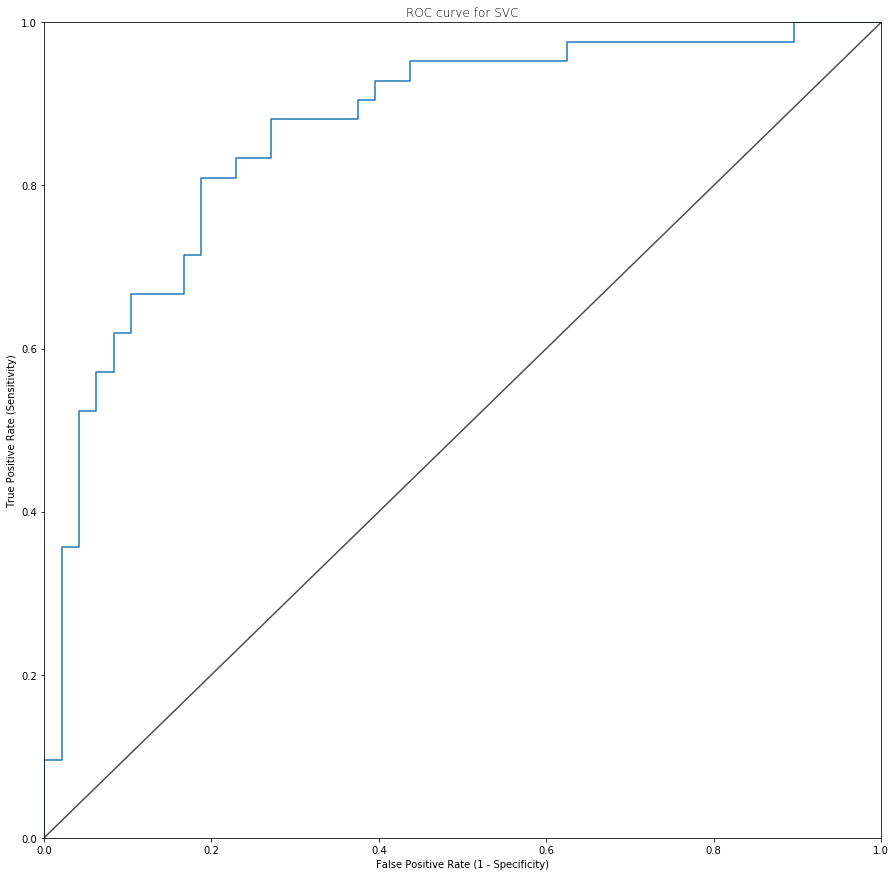

AUC Score : 0.8665674603174603


In [140]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_svc_poly_tuned)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 15)
plt.title('ROC curve for SVC', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

from sklearn.metrics import auc
auc_SVC_poly_tuned = auc(fpr, tpr)
print("AUC Score :", auc_SVC_poly_tuned)

По нагудување на хиперпараметарот C и за овој модел добивме добри перформанци, вредност за AUC од 0.866

### Компарација на резултати

In [133]:
X_final=["kNN", "NB", "LR", "DTC", "RFC", "SVC-rbf","SVC-Linear","SVC-Poly"]
y_final= [auc_kNN, auc_NB, auc_LR, auc_DTC, auc_RFC, auc_SVC, auc_SVC_linear, auc_SVC_poly]
print(auc_kNN, auc_NB, auc_LR, auc_DTC, auc_RFC, auc_SVC, auc_SVC_linear, auc_SVC_poly)

0.8645833333333333 0.8670634920634921 0.876984126984127 0.675595238095238 0.8311011904761905 0.8824404761904762 0.8705357142857143 0.8705357142857143


Само со фитување на датасетот во различните модели, најдобри перформанси дава Support Vector Machines со rbf kernel - 0.8824

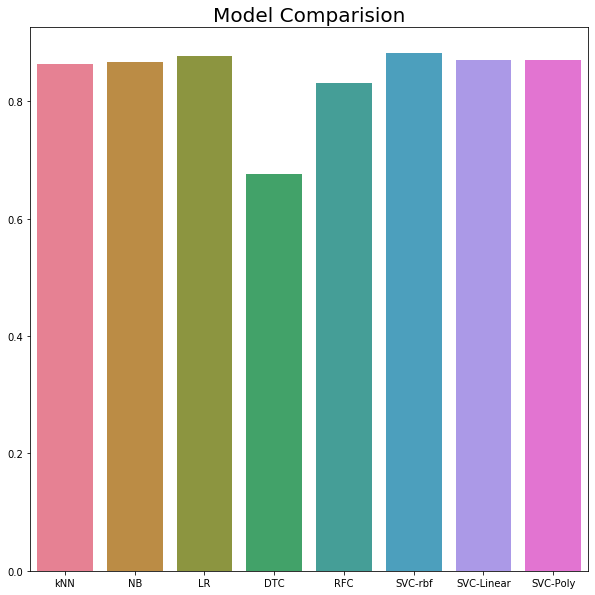

In [134]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final,y=y_final, palette='husl')
plt.xticks()
plt.title('Model Comparision',color = 'black',fontsize=20);

### Cross validation

In [137]:
X_final_cross = ["kNN", "NB", "LR", "DTC", "RFC","SVC-rbf","SVC-Linear","SVC-poly"]
y_final_cross = [auc_kNN_score, auc_NB_score, auc_LR_score, auc_DTC_score, auc_RFC_score, auc_SVC_score, auc_SVC_linear_cross, auc_SVC_poly_cross]
print(auc_kNN_score,auc_NB_score,auc_LR_score,auc_DTC_score,auc_RFC_score,auc_SVC_score, auc_SVC_linear_cross, auc_SVC_poly_cross)

0.7653769841269842 0.7405753968253967 0.8407738095238095 0.6056547619047619 0.7522321428571428 0.8348214285714285 0.8249007936507936 0.7485119047619048


Со користење на вкрстена валидација (cv=10), најдобри резултати добиваме од Lоgistic Regression - 0.84077

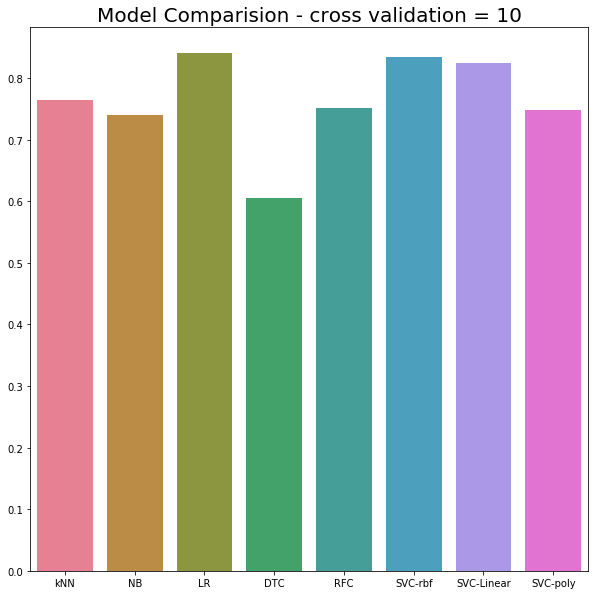

In [138]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final_cross,y=y_final_cross, palette='husl')
plt.xticks()
plt.title('Model Comparision - cross validation = 10',color = 'black',fontsize=20);

### Tunned hyperparametars

In [135]:
X_final_tuned = ["kNN", "NB", "LR", "DTC", "RFC", "SVC-rbf","SVC-linear","SVC-poly"]
y_final_tuned = [auc_kNN_tuned, auc_NB_tuned, auc_LR_tuned, auc_DTC_tuned, auc_RFC_tuned, auc_SVC_tuned, auc_SVC_linear_tuned,auc_SVC_poly_tuned]
print(auc_kNN_tuned,auc_NB_tuned,auc_LR_tuned,auc_DTC_tuned,auc_RFC_tuned,auc_SVC_tuned,auc_SVC_linear_tuned,auc_SVC_poly_tuned)

0.8670634920634921 0.8804563492063492 0.8814484126984128 0.6994047619047619 0.8606150793650794 0.8720238095238095 0.8764880952380952 0.8665674603174603


Со нагодување на соодвентите хиперпараметри за секој од моделите најдобри перформанци дава повторно Logistic Regression- 0.8814

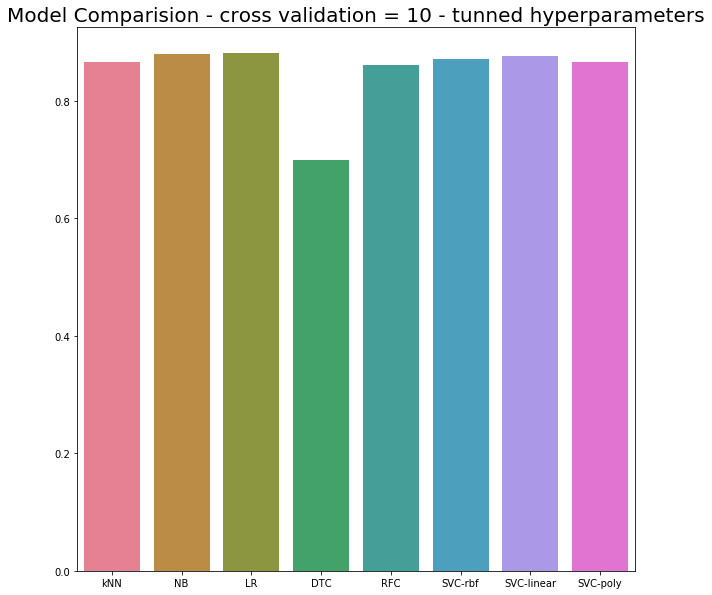

In [136]:
plt.figure(figsize=(10,10))
sns.barplot(x=X_final_tuned,y=y_final_tuned, palette='husl')
plt.xticks()
plt.title('Model Comparision - cross validation = 10 - tunned hyperparameters',color = 'black',fontsize=20);

Доколку треба да изберам еден модел, тоа би било Логистичка регресија со вкрстена валидација и нагодени хипер параметри. Иако Support Vector Machines со rbf kernel дава подобри резултати од Логистичка Регресија, тоа е во случај кога немам употребено никакво нагодување на параметри и вкрстена валидација, па затоа сметам дека би давал полош перформанс од Логистичка регресија на нови, досега невидени податоци.